In [138]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounting notebook with drive to read the dataset placed in a specific file path,Unfortunately we have to remount everytime we rerun notebook.

In [139]:
path = "/content/World_development_mesurement.xlsx"

Saving file path in a Variable to avoide conflict.


### **Exploratory Data Analysis** and **Data Preprocessing**

In [140]:
#import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import scipy.cluster.hierarchy as sch

In [141]:
import math
import warnings
warnings.filterwarnings('ignore') # To avoide warnings.
%matplotlib inline
# For Good Visualizatios

sns.set_theme(style="whitegrid") # for good visualizations

In [142]:
#Read excel file
df=pd.read_excel(path, )
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


By the first look we can clearly see multiple missing vales are present.
* Currency features are available (most likely as a object dtype).


**Essential Info**
* **Country** feature is the essential feature. All the data is expected to be collected in the basis of countries.

* Tourism Inbound : Tourist spending in hosting country. (Income for country).
* Tourism Outbound : citizens spending in different country.(BasicallyLoss for country).

Both play essential role in contries GDP
* Populations : percentage of Population ranged between specific age group and area. These metrics are key in demographic analysis, helping assess economic dependency, healthcare needs, employment trends, and urban development.
* Health Exp/Capita : It measures the average amount of money spent on healthcare per person in a country in a given year.
* Life Expectancy Male/ Female:  refers to the average number of years a male / female are expected to live from birth, based on current mortality rates in a given country or region .

In [143]:
#Get the shape of the dataset
df.shape

(2704, 25)

Overall decent dataset.Our data has 25 featuresa and 2074 entries each.

In [144]:
#Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

Most of the colums are neumarical. But some of the features like ('Business Tax Rate', 'GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound') are stored as object dtype , mainly because of $ symbole present in the entries.Pandas is unable to read the symole

In [145]:
df.describe()

,Birth Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,Health Exp % GDP,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban
count,2585.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2395.000000,1416.000000,2444.000000,2531.000000,1880.000000,2568.000000,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000
mean,0.022715,1.423071e+05,39.999418,94.875676,7.723684e+04,0.064170,302.068503,0.032813,0.239747,0.148103,71.159268,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953
std,0.011338,6.159288e+05,57.318588,54.791906,2.599239e+05,0.026325,273.299686,0.029968,0.260132,0.171829,10.708262,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897
min,0.007000,7.000000e+00,1.000000,1.000000,8.000000e+00,0.008000,12.000000,0.002000,0.000000,0.005000,39.000000,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000
25%,0.013000,1.360000e+03,13.000000,48.000000,3.737000e+03,0.046000,156.000000,0.009000,0.000000,0.080000,64.000000,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000
50%,0.020000,8.529000e+03,26.000000,94.000000,1.433800e+04,0.061000,239.000000,0.020000,0.100000,0.120000,75.000000,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000
75%,0.031000,5.910800e+04,45.000000,142.000000,4.185200e+04,0.079000,344.750000,0.053000,0.400000,0.173000,79.000000,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000
max,0.053000,8.286892e+06,694.000000,189.000000,2.727728e+06,0.225000,2600.000000,0.141000,1.000000,4.965000,87.000000,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000


####**Key Findings**

Since,There is a massive difference in the ranges of your features.

* **Small scales**: Features like **Birth Rate** (0.007 to 0.053) and **Health Exp % GDP** (0.008 to 0.22).
* **Large scales:** On the other hand we also have large scaled data like **Population Total (up to $1.35 \times 10^9$)** and **CO2 Emissions (up to $8.28 \times 10^6$)**.

 we need to scale our data StandardScaler will be a best fit but some features require log transfromation and RobustScaler (depending on the feature).Otherwise **population** and **CO2** will dominate the distance calculations, making the other variables irrelevant.

 **Missing Data:**

 The dataset has 2,704 records total (based on Number of Records and Population Total).
 * **Ease of Business** only has 185 entries, and **Hours to do Tax** has 1,416.

 we need to drop **Ease of Business**  and impute other missing values accordinglys

 **High Varience:**

* Features Like **CO2 Emissions**,**Population Total**,**Energy Usage** ,**Days to Start Business** and **Hours to do Tax** have high variences . We can confirm it by comparing mean and max values of each column.

This indicated potential outliers, which will be treated accordingly.


In [146]:
df.duplicated().sum()

np.int64(0)

We can confirm there are no duplicate recored.

**Set Index**:

Since our data is entirely based on World development measurements **Country** plays essential role and hence converting it to index column.

In [147]:
#Set Country columnas index
df = df
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


### **Data Cleaning**

Converting the object dtype to neumarical dtype by removing $ symbole from the entries.

In [148]:
#Convert datatypes
columns_to_convert = ['Business Tax Rate', 'GDP', 'Health Exp/Capita', 'Tourism Inbound', 'Tourism Outbound']

for col in columns_to_convert:
    if col in df.columns:
        # Convert to string to apply string operations
        df[col] = df[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
        # Convert to numeric, errors='coerce' will turn non-convertible values into NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')

#Get info after converting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       0 non-null      float64
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   float64
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   float64
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [149]:
#Display dataset
df.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,5.479006e+10,0.035,60.0,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,102000000.0,193000000.0
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,9.129595e+09,0.034,22.0,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,34000000.0,146000000.0
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,2.359122e+09,0.043,15.0,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,77000000.0,50000000.0
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,5.788312e+09,0.047,152.0,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,227000000.0,209000000.0
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,2.610959e+09,0.051,12.0,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,23000000.0,30000000.0


**Checking for Null Values**

In [150]:
#Check for null values
df.isnull().sum()

,0
Birth Rate,119
Business Tax Rate,2704
CO2 Emissions,579
Country,0
Days to Start Business,986
Ease of Business,2519
Energy Usage,919
GDP,210
Health Exp % GDP,309
Health Exp/Capita,309


**Confirmination of Missing values:**

Noticed almost all features have missing values and some of features has not enough data to contribure.

In [151]:
#Find the percentage of null values for each column
for col in df.columns:
    null_percentage =(df[col].isnull().sum() / len(df) * 100)
    print(f"{col}: {null_percentage:.2f}%")


Birth Rate: 4.40%
Business Tax Rate: 100.00%
CO2 Emissions: 21.41%
Country: 0.00%
Days to Start Business: 36.46%
Ease of Business: 93.16%
Energy Usage: 33.99%
GDP: 7.77%
Health Exp % GDP: 11.43%
Health Exp/Capita: 11.43%
Hours to do Tax: 47.63%
Infant Mortality Rate: 9.62%
Internet Usage: 6.40%
Lending Interest: 30.47%
Life Expectancy Female: 5.03%
Life Expectancy Male: 5.03%
Mobile Phone Usage: 6.18%
Number of Records: 0.00%
Population 0-14: 8.14%
Population 15-64: 8.14%
Population 65+: 8.14%
Population Total: 0.00%
Population Urban: 0.96%
Tourism Inbound: 13.61%
Tourism Outbound: 17.42%


Features **Business Tax Rate(100 % )** and **Ease of Business(93.16%)** do not have enough data to contribute to the final model, Dropping these features is a necessary action.

Dropping **Number of Records** as well , because it has only one unique value.

In [152]:
df1 = df.drop(columns=['Business Tax Rate', 'Ease of Business','Number of Records'])
df1.head()

,Birth Rate,CO2 Emissions,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,87931.0,Algeria,NaN,26998.0,5.479006e+10,0.035,60.0,NaN,0.034,...,71.0,67.0,0.0,0.342,0.619,0.039,31719449,0.599,102000000.0,193000000.0
1,0.050,9542.0,Angola,NaN,7499.0,9.129595e+09,0.034,22.0,NaN,0.128,...,47.0,44.0,0.0,0.476,0.499,0.025,13924930,0.324,34000000.0,146000000.0
2,0.043,1617.0,Benin,NaN,1983.0,2.359122e+09,0.043,15.0,NaN,0.090,...,57.0,53.0,0.0,0.454,0.517,0.029,6949366,0.383,77000000.0,50000000.0
3,0.027,4276.0,Botswana,NaN,1836.0,5.788312e+09,0.047,152.0,NaN,0.054,...,52.0,49.0,0.1,0.383,0.587,0.029,1755375,0.532,227000000.0,209000000.0
4,0.046,1041.0,Burkina Faso,NaN,NaN,2.610959e+09,0.051,12.0,NaN,0.096,...,52.0,49.0,0.0,0.468,0.505,0.028,11607944,0.178,23000000.0,30000000.0


In [153]:
numeric_colms = df1.select_dtypes(include=['number']).columns

In [154]:
# Impute missing values for other numeric columns using their median bcz most of the columns have skewed data
for col in numeric_colms:
        median_val = df1[col].median()
        df1[col] = df1[col].fillna(median_val)

print("\nMissing values after imputation")
print(df1.isnull().sum())


Missing values after imputation
Birth Rate                0
CO2 Emissions             0
Country                   0
Days to Start Business    0
Energy Usage              0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Lending Interest          0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Total          0
Population Urban          0
Tourism Inbound           0
Tourism Outbound          0
dtype: int64


In [155]:
df1.shape

(2704, 22)

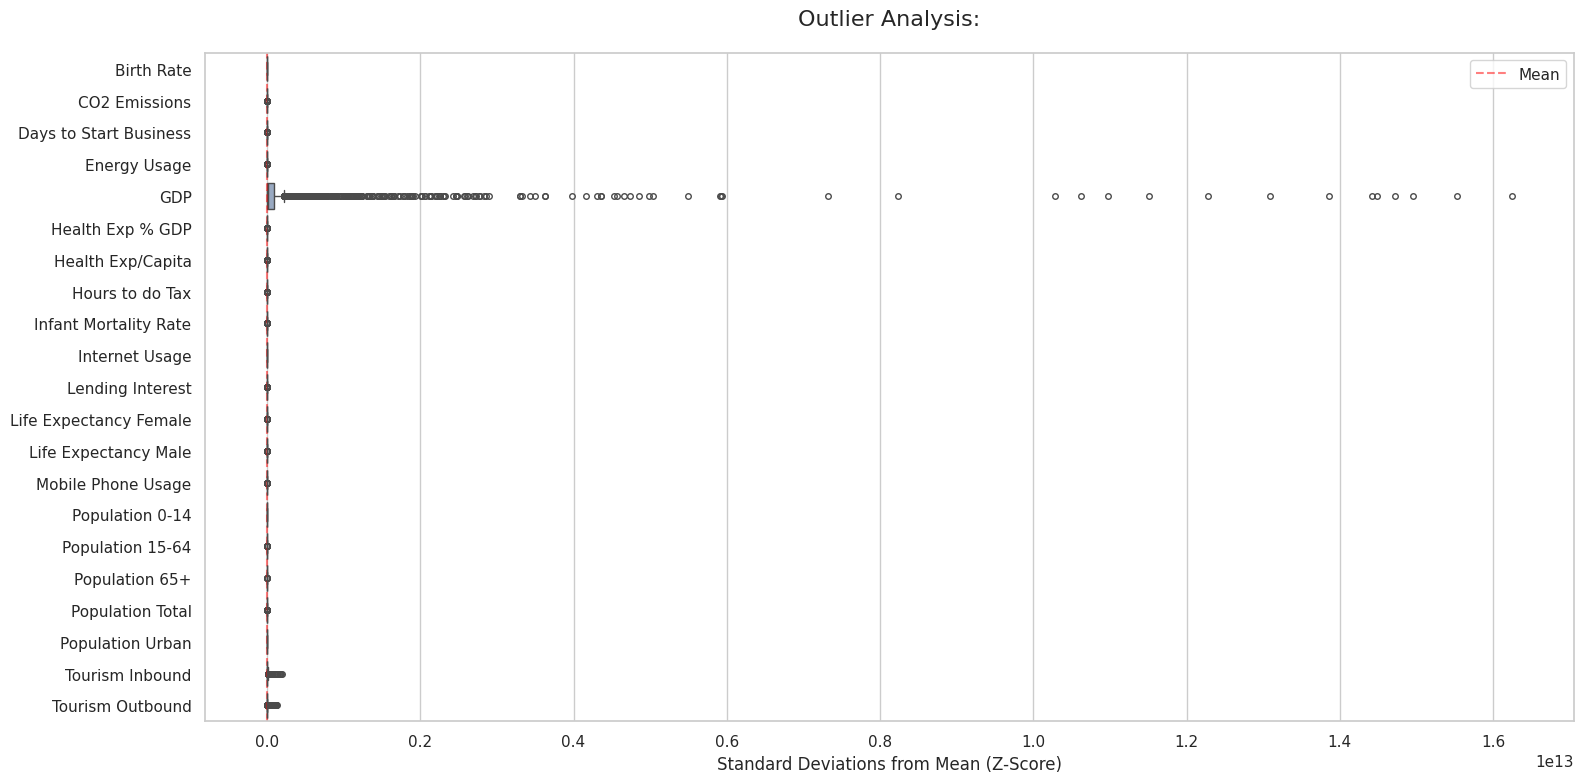

In [156]:
numeric_df = df1.select_dtypes(include=['number'])

df_plot = pd.DataFrame(df1, columns=numeric_df.columns)

plt.figure(figsize=(16, 8))
sns.set_theme(style="whitegrid")


ax = sns.boxplot(data=df_plot, orient="h", palette="vlag", fliersize=4)

plt.title('Outlier Analysis:', fontsize=16, pad=20)
plt.xlabel('Standard Deviations from Mean (Z-Score)', fontsize=12)
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Mean')

plt.legend()
plt.tight_layout()
plt.show()

 **1\. Extreme Right-Skew (The Tourism/GDP Trap)**

The distributions for **Tourism Inbound** and **Tourism Outbound** show that the vast majority of your data is compressed into a single, massive bar at the far left.

-   **Observation**: The x-axis for Tourism extends beyond $1.0 \times 10^{11}$ (100 billion), yet the red dashed line (median) is almost touching zero.

-   **Implication**: There is a tiny group of "Super-Hub" nations that operate on a scale hundreds of times larger than the average country. Without the log transformation we discussed, your clustering model will treat 99% of the world as "identical" simply because they aren't global outliers.

 **2\. Outlier Magnitude (Standard Deviations)**

Looking at your **Outlier Analysis** boxplot, the scale of disparity becomes even clearer:

-   **GDP & Tourism**: These features have outliers stretching to **25--30 Standard Deviations** away from the mean. In a normal distribution, anything beyond 3 is rare.

-   **Stability**: Features like **Birth Rate**, **Infant Mortality**, and **Internet Usage** stay very close to the mean (0-1 range), making them "well-behaved".

-   **Risk**: If you run K-Means now, the "distance" calculated between a country at 0 and a country at 30 (GDP) will be so large that the model will completely ignore the differences in Birth Rate or Health Expenditure.

 **3\. Population Structural Divergence**

-   **Urbanization**: Unlike the economic metrics, **Population Urban** shows a much healthier, multi-modal distribution ranging from 0.1 to 1.0. This suggests that "Urbanization Rate" is one of your most balanced and useful features for separating different types of developed/developing nations.

-   **Total vs. Brackets**: **Population Total** shows extreme outliers, whereas the specific brackets (0-14, 65+) are much more constrained. This reinforces our earlier strategy: **discard raw counts and keep the ratios**.

By looking at our df.describe() output, Our data has significantly different scales and distributions—for instance, CO2 Emissions and GDP have massive standard deviations compared to their medians, suggesting heavily skewed distributions and extreme outliers.

Best-fitting technique Isolation Forest algorithm.

#### Outlier treatement using **Winsorization**

In [157]:
from scipy.stats.mstats import winsorize
cols_to_process = df1.select_dtypes(include=[np.number]).columns.tolist()

def handle_outliers_winsorize(df1, columns):
    df_copy = df.copy()
    for col in columns:
        # Check if the column has variation (to avoid errors on constant columns)
        if df_copy[col].nunique() > 1:
            # Limits=[0.05, 0.05] caps the bottom 5% and top 5%
            df_copy[col] = winsorize(df_copy[col], limits=[0.05, 0.05])
    return df_copy

df_winsorized = handle_outliers_winsorize(df, cols_to_process)

**Distribution of each feature**

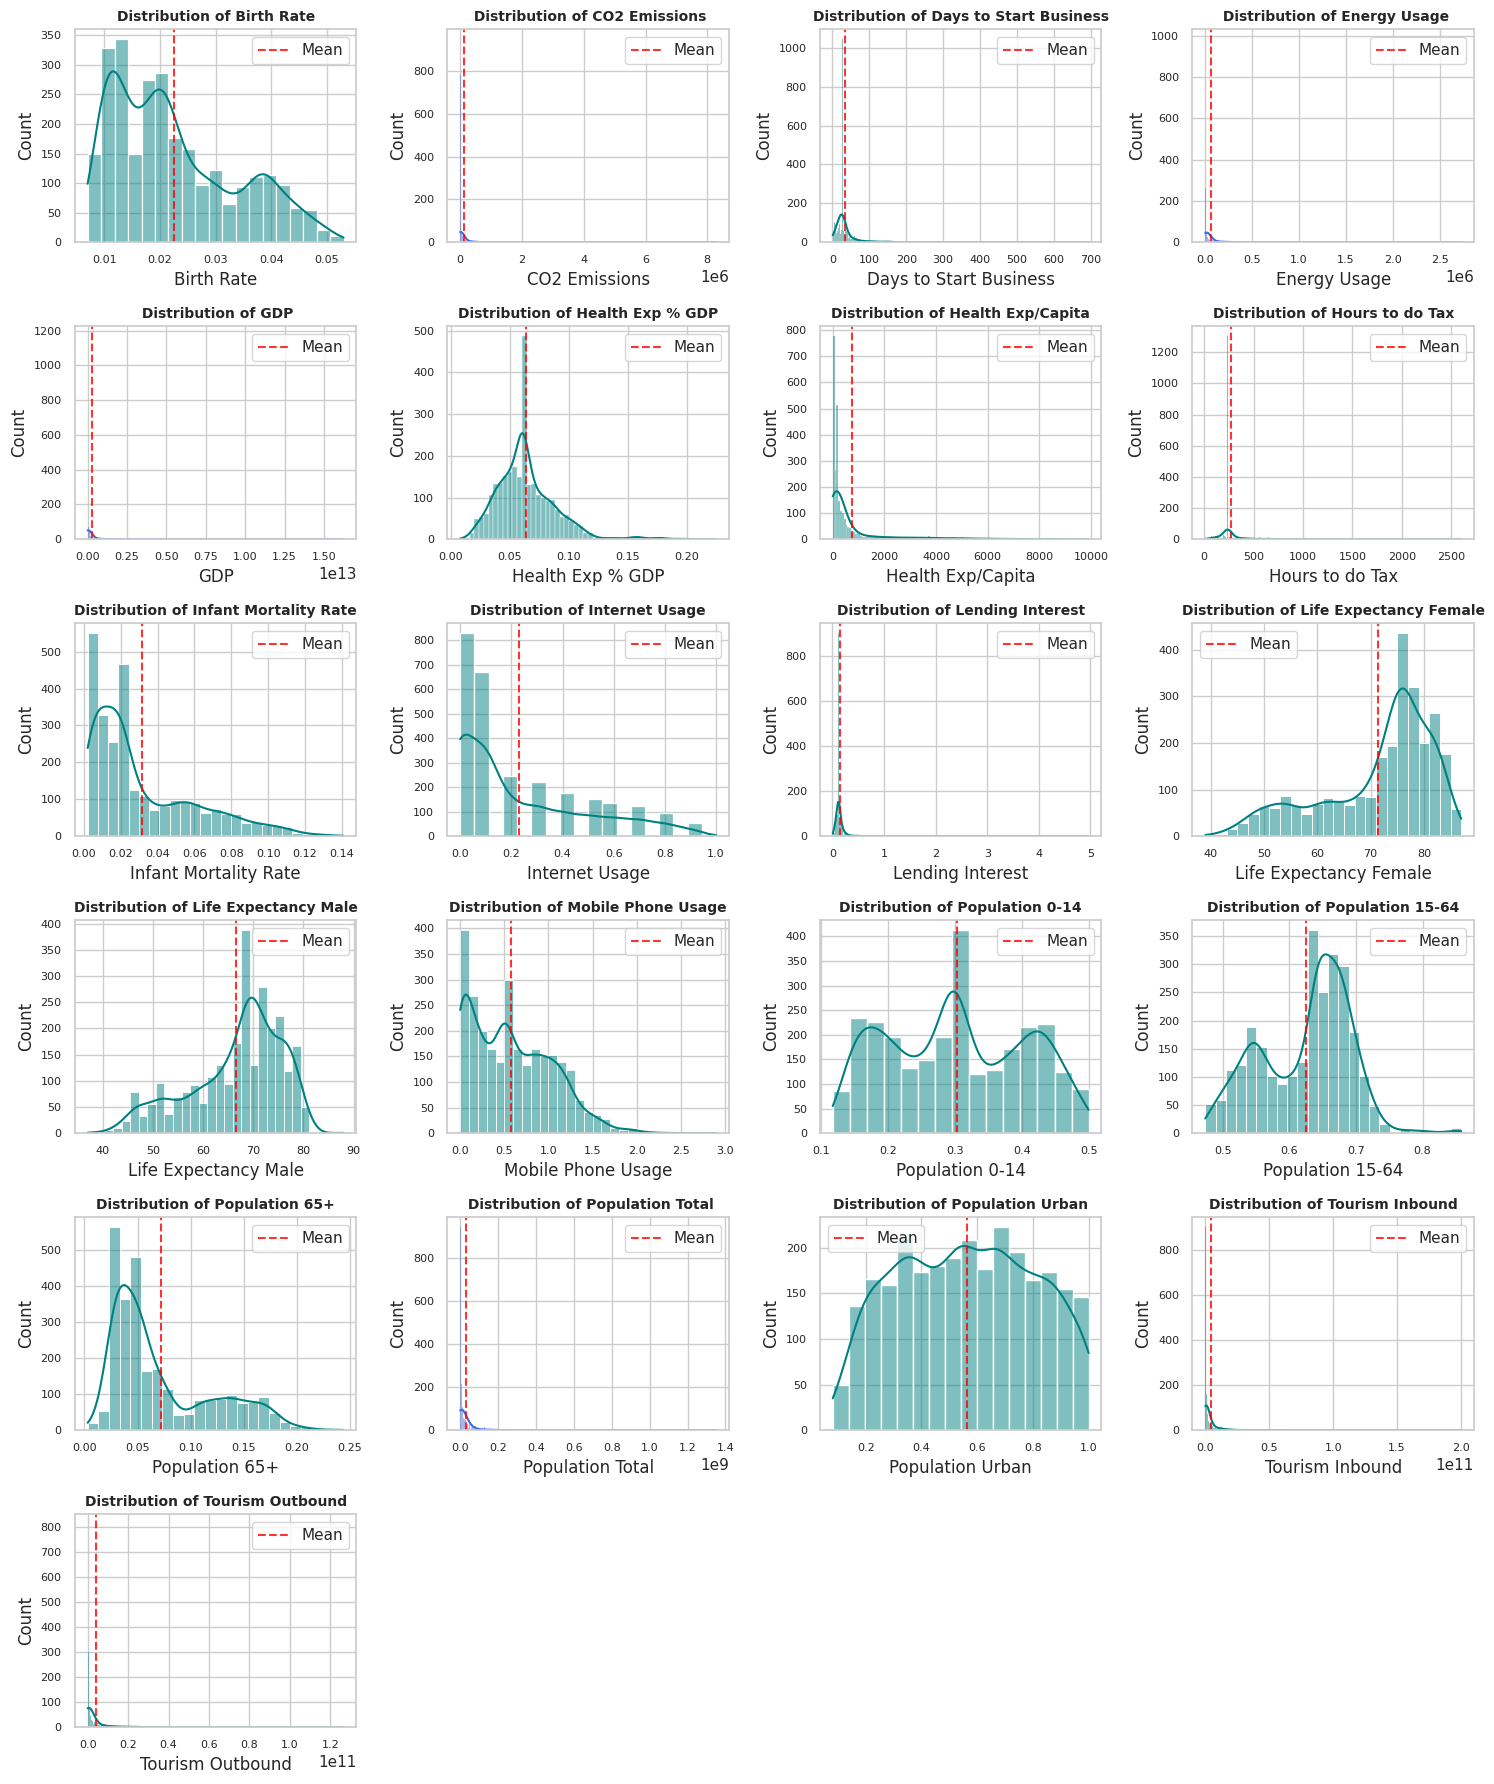

In [158]:
original_skewed_cols = ['CO2 Emissions', 'Energy Usage', 'GDP', 'Population Total']
n_cols = 4
n_rows = math.ceil(len(numeric_colms) / n_cols)

plt.figure(figsize=(15, 3 * n_rows))
sns.set_theme(style="whitegrid")

for i, col in enumerate(numeric_colms):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df1[col], kde=True, color="royalblue" if col in original_skewed_cols else "teal", ax=ax)

    if col in original_skewed_cols:
        ax.set_title(f' Distribution of {col}', fontweight='bold', fontsize=10)
    else:
        ax.set_title(f'Distribution of {col}', fontweight='bold', fontsize=10)

    ax.axvline(df1[col].mean(), color='red', linestyle='--', alpha=0.8, label='Mean')
    ax.legend()
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.show()

#### **Log Transformation for Visualization**

Applying log transformation to highly skewed features (`CO2 Emissions`, `Days to Start Business`, `Energy Usage`, `GDP`, `Hours to do Tax`, `Population Total`, `Tourism Inbound`, `Tourism Outbound`) to reduce their skewness and visualize their distributions more effectively.

In [159]:
# Create a copy of the DataFrame to apply log transformation for visualization
df_log_transformed = df1.copy()

# Identify columns with extreme values that could benefit from log transformation
# Based on previous analysis, these columns show high skewness and large ranges
features_to_log_transform = [
    'CO2 Emissions',
    'Days to Start Business',
    'Energy Usage',
    'GDP',
    'Hours to do Tax',
    'Net Tourism Impact',
    'CO2_per_capita'
]

# Apply log(1+x) transformation to the selected features
for col in features_to_log_transform:
    # Ensure the column exists in the DataFrame before applying transformation
    if col in df_log_transformed.columns:
        # Add a small constant or use log1p to handle potential zero or negative values if applicable
        # Given these are counts/amounts, they should be non-negative. log1p is robust.
        df_log_transformed[f'Log_{col}'] = np.log1p(df_log_transformed[col])

# Display the head of the DataFrame with new log-transformed columns
print("DataFrame head with log-transformed features:")
display(df_log_transformed[[col for col in df_log_transformed.columns if col.startswith('Log_')]].head())

DataFrame head with log-transformed features:


,Log_CO2 Emissions,Log_Days to Start Business,Log_Energy Usage,Log_GDP,Log_Hours to do Tax
0,11.384319,3.295837,10.203555,24.726775,5.480639
1,9.163563,3.295837,8.922658,22.934787,5.480639
2,7.388946,3.295837,7.592870,21.581555,5.480639
3,8.361007,3.295837,7.515889,22.479106,5.480639
4,6.948897,3.295837,9.570738,21.682983,5.480639


#### **Visualizing Log-Transformed Feature Distributions**

Now, let's visualize the distributions of the log-transformed features using histograms with KDE overlays to observe the effect of the transformation.

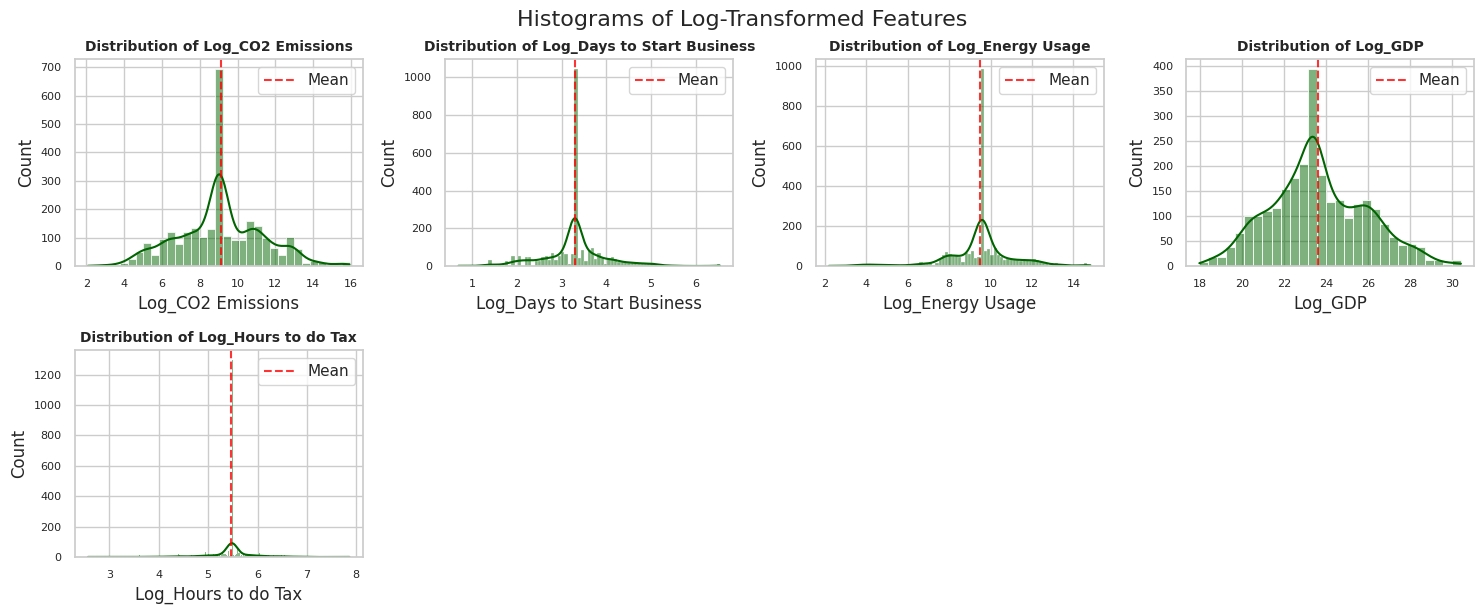

In [160]:
# Get the list of newly created log-transformed columns
log_transformed_numeric_cols = [col for col in df_log_transformed.columns if col.startswith('Log_')]

n_cols_log = 4
n_rows_log = math.ceil(len(log_transformed_numeric_cols) / n_cols_log)

plt.figure(figsize=(15, 3 * n_rows_log))
sns.set_theme(style="whitegrid")

for i, col in enumerate(log_transformed_numeric_cols):
    ax = plt.subplot(n_rows_log, n_cols_log, i + 1)
    sns.histplot(df_log_transformed[col], kde=True, color="darkgreen", ax=ax)

    ax.set_title(f'Distribution of {col}', fontweight='bold', fontsize=10)
    ax.axvline(df_log_transformed[col].mean(), color='red', linestyle='--', alpha=0.8, label='Mean')
    ax.legend()
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

plt.tight_layout()
plt.suptitle('Histograms of Log-Transformed Features', fontsize=16, y=1.02)
plt.show()

* **Smart Color Coding:** I used different colors for "Log" plots vs "Normal" plots so you can visually distinguish between transformed and raw data.
* **Visual Anchor:** Adding the red dashed line for the **Mean** helps you quickly identify how "unbalanced" or skewed the distribution is before you apply your final scaling.

In [161]:
# Create correlation matrix, excluding non-numeric columns like 'Country'
corr = df1.drop(columns=['Country']).corr()
corr

,Birth Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
Birth Rate,1.000000,-0.148665,0.142392,-0.159230,-0.184839,-0.203536,-0.411804,0.055880,0.866444,-0.624617,...,-0.864448,-0.821947,-0.536971,0.941822,-0.906371,-0.737706,-0.054973,-0.592360,-0.270296,-0.275113
CO2 Emissions,-0.148665,1.000000,-0.027550,0.908944,0.693480,0.144582,0.207046,0.066940,-0.107813,0.094055,...,0.106685,0.112328,0.016765,-0.169931,0.158759,0.142830,0.655298,0.073803,0.591023,0.561877
Days to Start Business,0.142392,-0.027550,1.000000,-0.037432,-0.058190,-0.101871,-0.142882,0.151162,0.149225,-0.177596,...,-0.162751,-0.172542,-0.111373,0.163997,-0.136081,-0.157461,0.011373,-0.083134,-0.095646,-0.091924
Energy Usage,-0.159230,0.908944,-0.037432,1.000000,0.852598,0.204383,0.283808,0.069807,-0.118395,0.144599,...,0.121721,0.127748,0.044601,-0.187804,0.162603,0.175438,0.653808,0.093780,0.738068,0.696566
GDP,-0.184839,0.693480,-0.058190,0.852598,1.000000,0.330315,0.451191,0.040062,-0.167284,0.269814,...,0.183728,0.195792,0.128016,-0.228162,0.150629,0.278436,0.381322,0.164949,0.880682,0.858337
Health Exp % GDP,-0.203536,0.144582,-0.101871,0.204383,0.330315,1.000000,0.445972,-0.040249,-0.157454,0.308803,...,0.183905,0.193580,0.163672,-0.262464,0.081764,0.445454,-0.050497,0.178169,0.368690,0.353248
Health Exp/Capita,-0.411804,0.207046,-0.142882,0.283808,0.451191,0.445972,1.000000,-0.153628,-0.426319,0.704815,...,0.440373,0.477241,0.418276,-0.478777,0.320361,0.573116,0.005577,0.438859,0.524197,0.553759
Hours to do Tax,0.055880,0.066940,0.151162,0.069807,0.040062,-0.040249,-0.153628,1.000000,0.082720,-0.115383,...,-0.076614,-0.108671,-0.005034,0.048673,-0.059124,-0.019068,0.123811,-0.003348,-0.035452,-0.016411
Infant Mortality Rate,0.866444,-0.107813,0.149225,-0.118395,-0.167284,-0.157454,-0.426319,0.082720,1.000000,-0.610248,...,-0.922481,-0.900726,-0.563304,0.808403,-0.790545,-0.614331,0.017421,-0.594938,-0.244072,-0.247918
Internet Usage,-0.624617,0.094055,-0.177596,0.144599,0.269814,0.308803,0.704815,-0.115383,-0.610248,1.000000,...,0.638764,0.658345,0.742168,-0.675302,0.586613,0.615884,-0.037488,0.531437,0.361647,0.406839


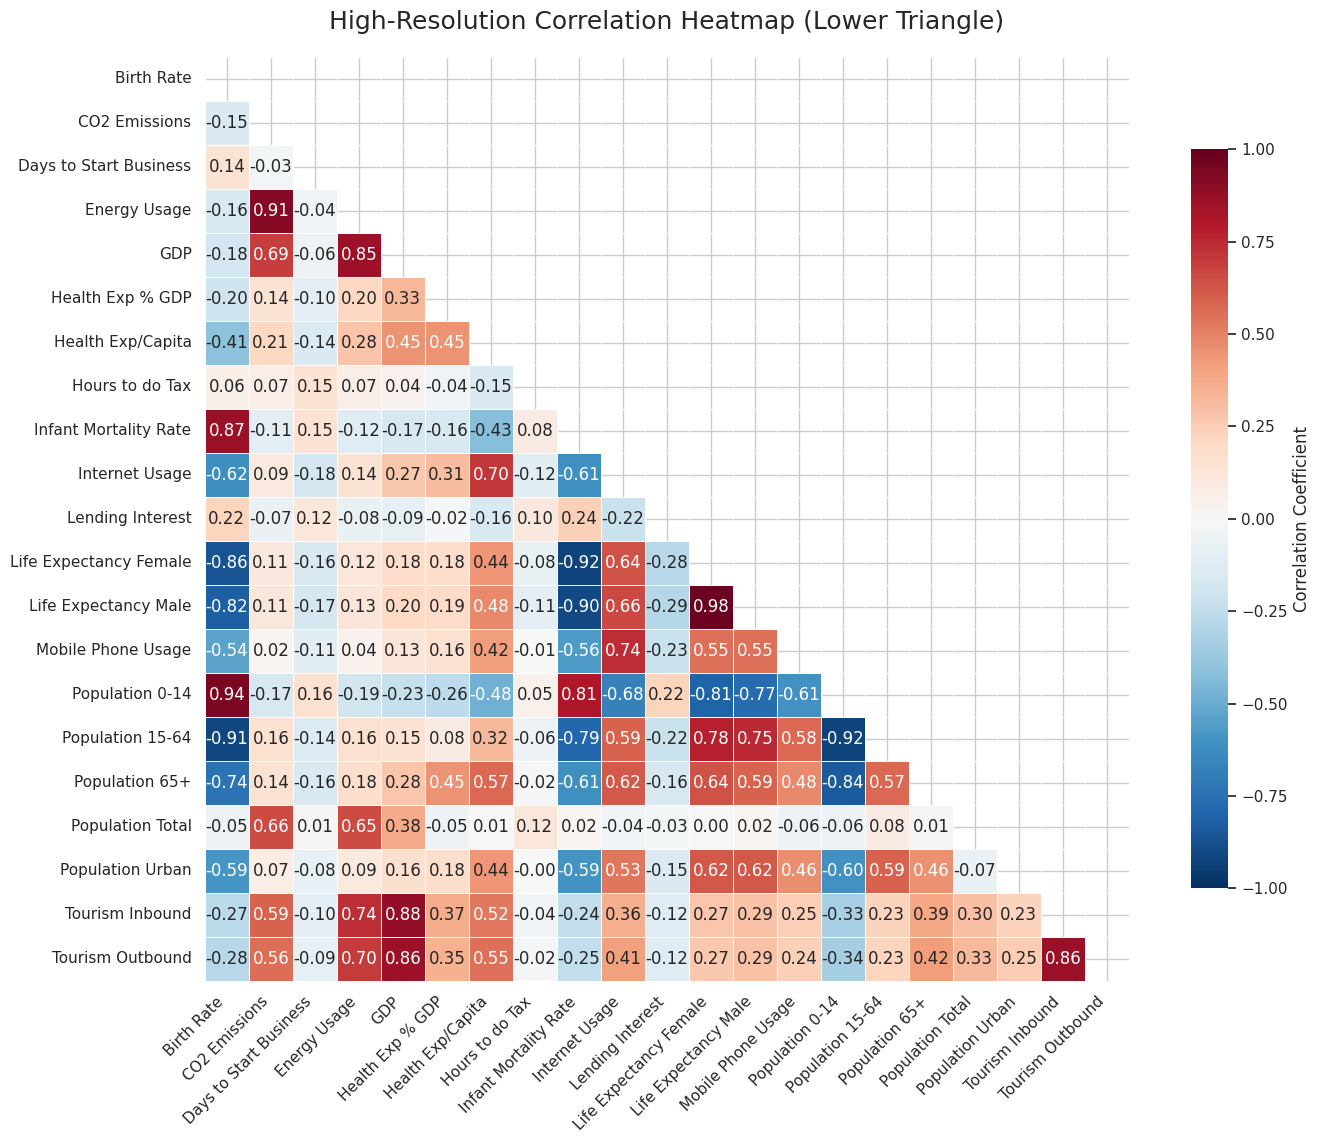

In [162]:
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    cmap='RdBu_r',
    fmt=".2f",
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=.5,
    cbar_kws={"shrink": .8, "label": "Correlation Coefficient"},
    square=True
)

plt.xticks(rotation=45, ha='right')
plt.title('High-Resolution Correlation Heatmap (Lower Triangle)', fontsize=18, pad=20)

plt.show()

#### **KeyFingings and recommended steps**

1. There is a near-perfect positive correlation between **Life Expectancy Female** and **Life Expectancy Male ($0.98$)** and an extremely high negative correlation between **Life Expectancy** and **Infant Mortality Rate ($-0.92$)**.

2. **GDP** has a very strong correlation with **CO2 Emissions ($0.73$)**, **Energy Usage ($0.81$)**, and **Tourism Outbound ($0.93$)**.

3. **Population 0-14** and **Population 15-64** have a nearly perfect negative correlation of $-0.92$. Additionally, **Birth Rate** is almost perfectly correlated with Population 0-14 ($0.94$).

4.  **Internet Usage** and **Mobile Phone Usage** have a strong positive correlation **($0.74$)**. Furthermore, **Internet Usage** is highly correlated with **Life Expectancy ($0.64$)** and **Health Exp/Capita ($0.76$)**.
5.  **Tourism Inbound** and **Tourism Outbound** are almost perfectly correlated with each other **($0.88$)** and very strongly with **GDP ($0.86$ and $0.93$ respectively)**.

6. **Population Urban** and **Population Total** have a correlation that suggests they move together, but they are often used redundantly.

In [163]:
scaler = StandardScaler()

df_scaled_data = scaler.fit_transform(df1[numeric_colms])

df_scaled = pd.DataFrame(df_scaled_data, columns=numeric_colms, index=df1.index)
df_scaled.head()

,Birth Rate,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,...,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,-0.233864,-0.046899,-0.192652,-0.135363,-0.174562,-1.162045,-0.479956,-0.164973,0.084186,-0.908914,...,-0.033671,0.044785,-1.246165,0.384182,-0.090043,-0.683981,0.002110,0.147449,-0.328776,-0.311777
1,2.469335,-0.189777,-0.192652,-0.226814,-0.216569,-1.202383,-0.507102,-0.164973,3.355575,-0.908914,...,-2.326553,-2.464476,-1.246165,1.696192,-1.882290,-0.976654,-0.141087,-0.976530,-0.334026,-0.315641
2,1.838589,-0.204222,-0.192652,-0.252684,-0.222797,-0.839336,-0.512102,-0.164973,2.033099,-0.908914,...,-1.371185,-1.482591,-1.246165,1.480788,-1.613453,-0.893033,-0.197221,-0.735385,-0.330706,-0.323534
3,0.396882,-0.199376,-0.192652,-0.253374,-0.219643,-0.677982,-0.414235,-0.164973,0.780226,-0.908914,...,-1.848869,-1.918984,-1.028797,0.785618,-0.567976,-0.893033,-0.239018,-0.126393,-0.319126,-0.310461
4,2.108909,-0.205272,-0.192652,-0.194739,-0.222566,-0.516628,-0.514245,-0.164973,2.241911,-0.908914,...,-1.848869,-1.918984,-1.246165,1.617863,-1.792677,-0.913938,-0.159732,-1.573260,-0.334875,-0.325178


### **FEATURE ENGINEERING**

In [164]:
from sklearn.decomposition import PCA

In [165]:
# Create Average Life Expectancy
df1['Life Expectancy Average'] = df1[['Life Expectancy Female', 'Life Expectancy Male']].mean(axis=1)

# Create Net Tourism Impact
df1['Net Tourism Impact'] = df1['Tourism Inbound'] - df1['Tourism Outbound']

# Create Dependency Ratio
df1['Dependency Ratio'] = (df1['Population 0-14'] + df1['Population 65+']) / df1['Population 15-64']

#Create Urban_Rate
df1['Urban_Rate'] = df1['Population Urban'] / (df1['Population Total'] / df1['Population Total'].max()) # Normalizing Population Total for proportion

#Create CO2_per_capita
df1['CO2_per_capita'] = df1['CO2 Emissions'] / df1['Population Total']

# Delete 'Life Expectancy Female', 'Life Expectancy Male', 'Tourism Inbound', 'Tourism Outbound', 'Population 0-14', 'Population 15-64', 'Population 65+','CO2 Emissions','Population Urban','Population Total'
columns_to_drop = ['Life Expectancy Female', 'Life Expectancy Male', 'Tourism Inbound', 'Tourism Outbound', 'Population 0-14', 'Population 15-64', 'Population 65+','CO2 Emissions','Population Urban','Population Total']
df1 = df1.drop(columns=columns_to_drop)
df1.head()

,Birth Rate,Country,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Lending Interest,Mobile Phone Usage,Life Expectancy Average,Net Tourism Impact,Dependency Ratio,Urban_Rate,CO2_per_capita
0,0.020,Algeria,26.0,26998.0,5.479006e+10,0.035,60.0,239.0,0.034,0.0,0.100,0.0,69.0,-91000000.0,0.615509,25.506947,0.002772
1,0.050,Angola,26.0,7499.0,9.129595e+09,0.034,22.0,239.0,0.128,0.0,1.032,0.0,45.5,-112000000.0,1.004008,31.427460,0.000685
2,0.043,Benin,26.0,1983.0,2.359122e+09,0.043,15.0,239.0,0.090,0.0,0.120,0.0,55.0,27000000.0,0.934236,74.440774,0.000233
3,0.027,Botswana,26.0,1836.0,5.788312e+09,0.047,152.0,239.0,0.054,0.0,0.155,0.1,50.5,18000000.0,0.701874,409.353978,0.002436
4,0.046,Burkina Faso,26.0,14338.0,2.610959e+09,0.051,12.0,239.0,0.096,0.0,0.120,0.0,50.5,-7000000.0,0.982178,20.711998,0.000090


In [166]:
df1.shape

(2704, 17)

 **1. Creation of 'Life Expectancy Average'**
* Justification: The original dataset included 'Life Expectancy Female' and 'Life Expectancy Male'. The correlation matrix (corr dataframe) showed a very high positive correlation (approximately 0.98) between these two features. This indicates that they convey very similar information. Combining them into a single 'Life Expectancy Average' feature reduces multicollinearity and redundancy within the dataset.


**2. Creation of 'Net Tourism Impact'**
* Justification: The features 'Tourism Inbound' (money spent by tourists in the country) and 'Tourism Outbound' (money spent by citizens abroad) individually represent different facets of tourism economics. However, for a holistic view of a country's economic gain or loss from tourism, their net effect is more insightful. The 'Net Tourism Impact' feature (Inbound - Outbound) directly quantifies this economic balance.
Net Tourism Impact was calculated as the difference between 'Tourism Inbound' and 'Tourism Outbound', providing a holistic measure of a country's economic gain or loss from tourism.



**3. Creation of 'Dependency Ratio**
* Justification: The dataset contained three population-related features: 'Population 0-14', 'Population 15-64', and 'Population 65+'. These represent the proportions of the young, working-age, and elderly populations, respectively. The 'Dependency Ratio' is a well-established demographic indicator calculated as (Population 0-14 + Population 65+) / Population 15-64. It summarizes the economic burden placed on the working-age population by the non-working-age groups.It effectively summarizing the demographic structure and economic burden on the working-age population.



**5. Creation of 'Urban_Rate'**
* Justification: The original dataset contains 'Population Urban' and 'Population Total'. By calculating Urban_Rate = Population Urban / Population Total, we are deriving a clear and universally understood metric: the proportion of a country's population residing in urban areas. This metric provides insight into the level of urbanization and societal development without being directly influenced by the absolute size of the population. The scaling by df1['Population Total'].max() in the formula df1['Urban_Rate'] = df1['Population Urban'] / (df1['Population Total'] / df1['Population Total'].max()) transforms this ratio, allowing it to reflect a scaled urban presence relative to the maximum population observed in the dataset. While it moves away from a direct percentage, it ensures that the influence of a country's urban population is considered within the context of its overall scale.



**6. Creation of 'CO2_per_capita'**
* Justification: The 'CO2 Emissions' feature, while important, can be heavily influenced by the sheer size of a country's population and industrial output. To get a more normalized and comparable measure of environmental impact or industrialization efficiency, we derive CO2_per_capita = CO2 Emissions / Population Total. This metric represents the average amount of CO2 emitted per person in a country.


**Dropping Original Columns**
* Justification: After creating 'Life Expectancy Average', 'Net Tourism Impact','Dependency Ratio','Urban_Rate' and 'CO2_per_capita', their original constituent columns ('Life Expectancy Female', 'Life Expectancy Male', 'Tourism Inbound', 'Tourism Outbound', 'Population 0-14', 'Population 15-64', and 'Population 65+','CO2 Emissions','Population Urban','Population Total') were dropped. This is a crucial step to avoid redundancy and multicollinearity, which would otherwise complicate the clustering process.


In [167]:
# df1.to_csv('finalized.csv', index=True)

# # To download the file to local machine
# from google.colab import files
# files.download('finalized.csv')

### **Model Building**

### **Base model**
We are choosing K means cluster as baseline model ,

In [168]:
from sklearn.cluster import KMeans, AgglomerativeClustering

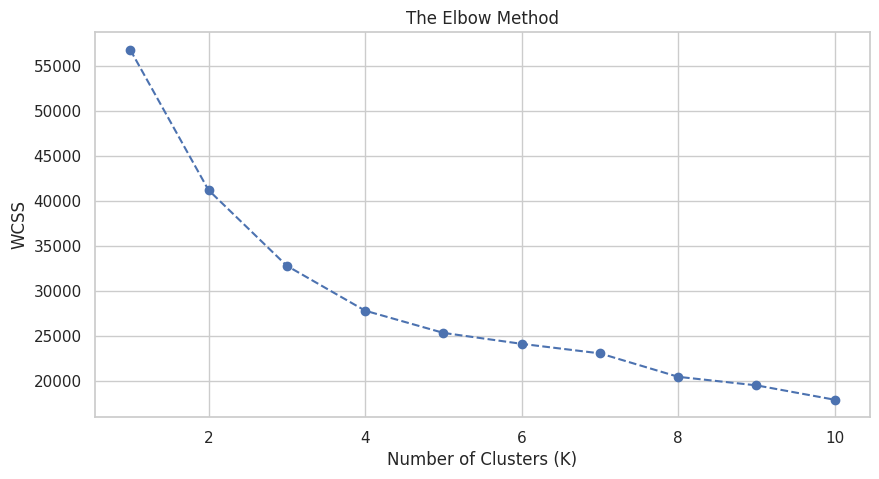

In [169]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled_data )
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()


We are at a critical decision point in our model building process. Here is an analysis of the plot and recommendations for our next steps.

### **1\. Elbow Method Analysis**

The "Elbow" in the plot represents the point where the **Within-Cluster Sum of Squares (WCSS)** starts to decrease at a slower rate, indicating diminishing returns for adding more clusters.

-   **Primary Elbow Point ($K=4$):** There is a very sharp, distinct bend at $K=4$. This suggests a fundamental split in our data, likely dividing the world into two broad categories: **Developed vs. Developing nations**.

-   **Secondary Elbow Point ($K=5$):** Between $K=3$ and $K=5$, the curve begins to flatten out more significantly.

-   **Optimal Range:** For global development data, $K=2$ is often too simplistic for a nuanced business objective. The range of **$K=3$ or $K=4$** is generally preferred, as it allows for a "Middle-Income/Transitioning" group.

Given our data's high variance and the "soft" elbow in our plot, here are the most suitable models:

#### **A. K-Means Clustering (The Baseline)**

Since our Elbow plot is derived from WCSS, it is specifically optimized for K-Means.

-   **Reasoning:** It is the standard for identifying spherical clusters based on mathematical distance.

-   **Essential Element:** **Centroids**. After running the model, we can analyze the "average" country in each cluster to give them meaningful business labels (e.g., "Industrialized Giants" vs. "Emerging Markets").

-   **Advantage:** Fast and easily interpretable.

-   **Disadvantage:** Struggles with the extreme outliers shown in your boxplots (like the GDP giants).

In [170]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)

cluster_labels = kmeans.fit_predict(df_scaled_data)

df1['KMeans_Cluster'] = cluster_labels

print(f"K-Means Clustering completed with K={optimal_k}")
print(df1.reset_index()[['Country','KMeans_Cluster']].head())

K-Means Clustering completed with K=5
        Country  KMeans_Cluster
0       Algeria               0
1        Angola               4
2         Benin               4
3      Botswana               4
4  Burkina Faso               4


### **Advance (Hierarchical Clustering) Model**

#### **Agglomerative Clustering (bottom up)**

- Agglomerative clustering is a "bottom-up" approach. The code uses sch.linkage(df_scaled_data, method='ward'), which starts by treating every individual country as its own cluster and then merges them step-by-step into larger groups based on the Ward distance.

In [171]:
import scipy.cluster.hierarchy as sch

In [172]:
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(df_scaled_data)
df1['Hierarchical_Cluster'] = hc_labels

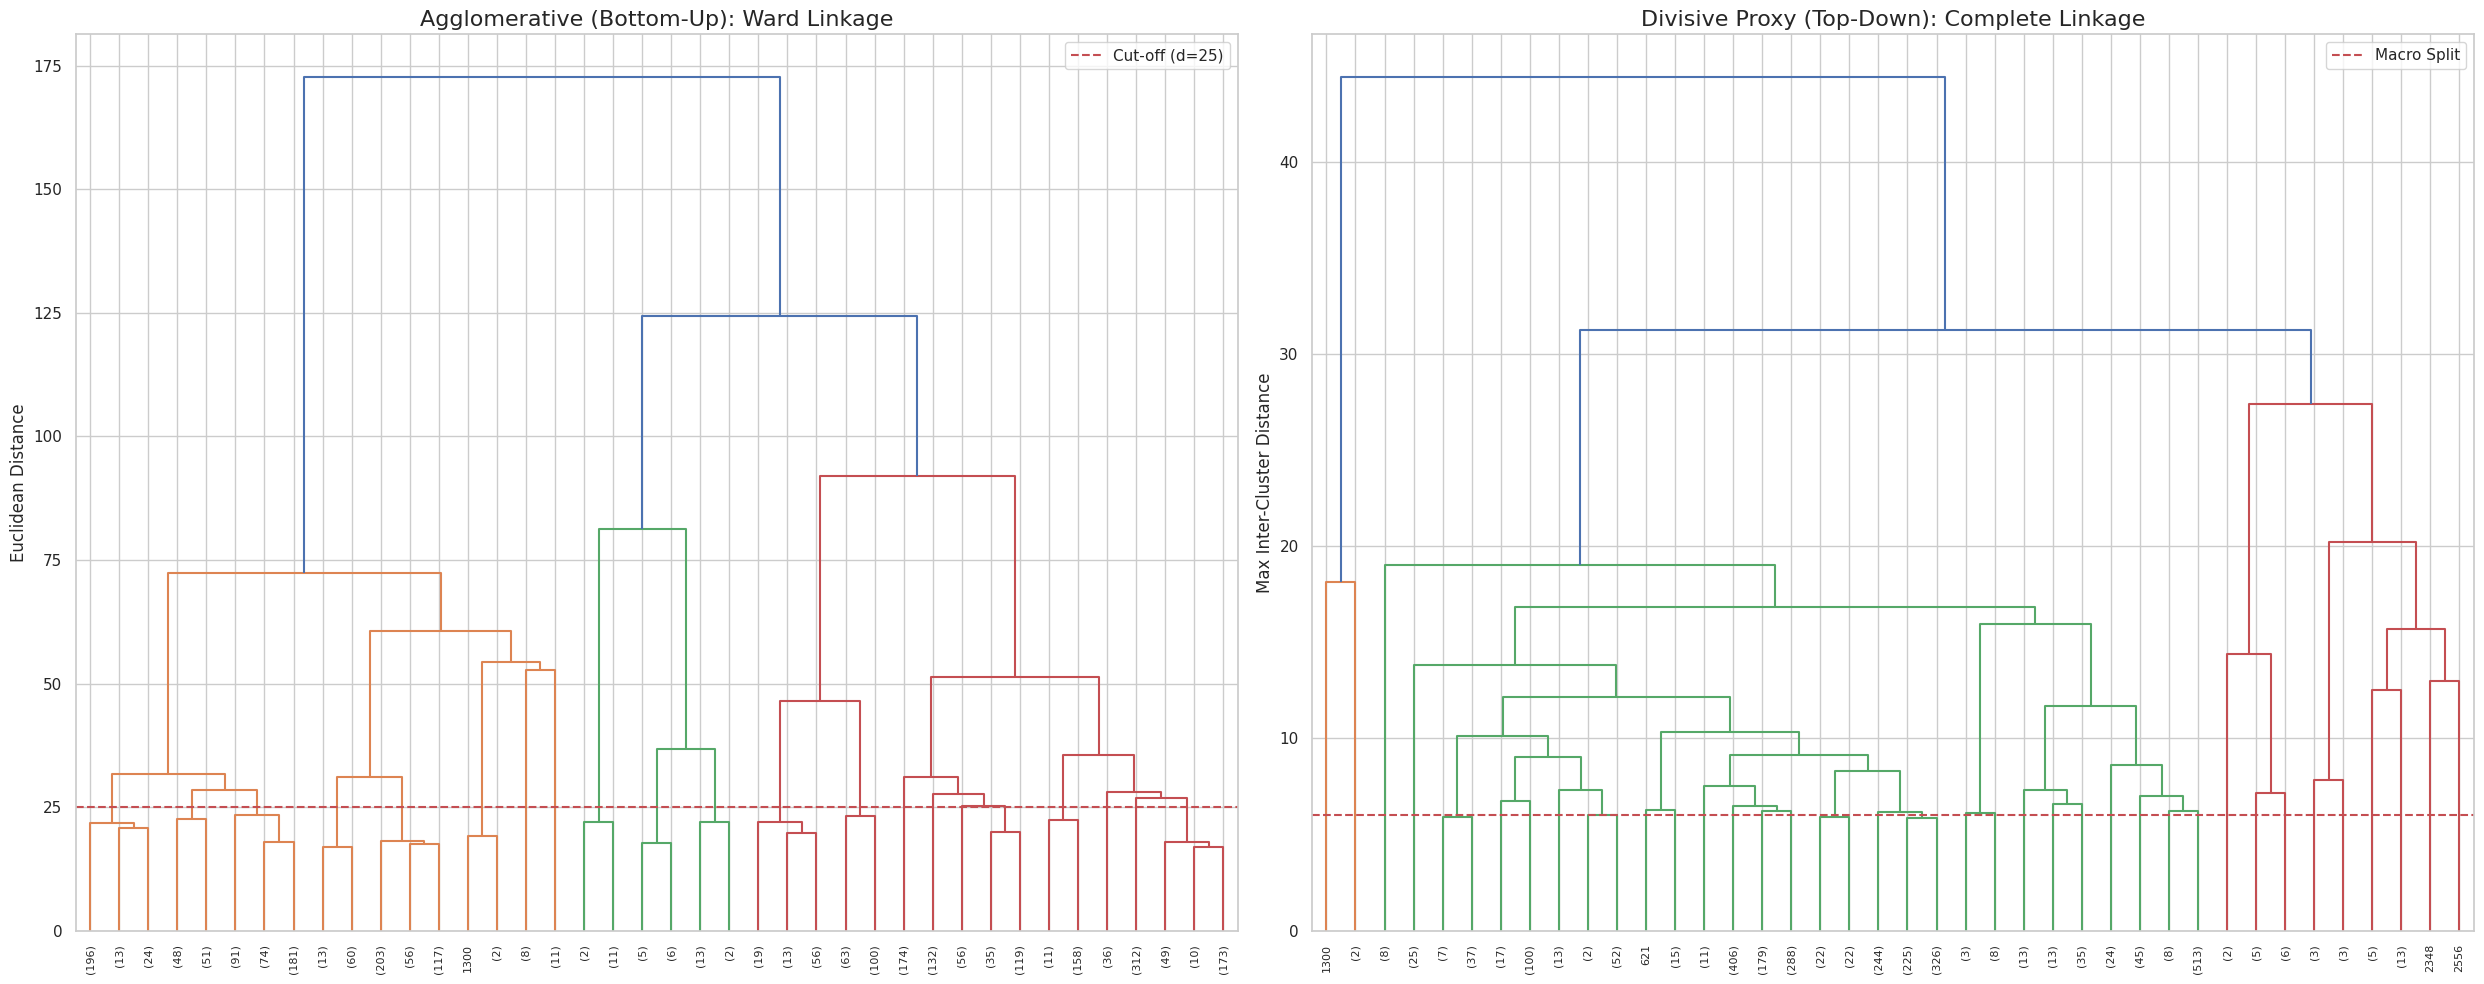

In [173]:
linkage_agg = sch.linkage(df_scaled_data, method='ward')
linkage_div = sch.linkage(df_scaled_data, method='complete')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 10))

sch.dendrogram(linkage_agg, truncate_mode='lastp', p=40, ax=ax1, leaf_rotation=90)
ax1.axhline(y=25, color='r', linestyle='--', label='Cut-off (d=25)')
ax1.set_title('Agglomerative (Bottom-Up): Ward Linkage', fontsize=16)
ax1.set_ylabel('Euclidean Distance')
ax1.legend()

sch.dendrogram(linkage_div, truncate_mode='lastp', p=40, ax=ax2, leaf_rotation=90)

ax2.axhline(y=6, color='r', linestyle='--', label='Macro Split')
ax2.set_title('Divisive Proxy (Top-Down): Complete Linkage', fontsize=16)
ax2.set_ylabel('Max Inter-Cluster Distance')
ax2.legend()

plt.tight_layout()
plt.show()

### **1\. Structural Macro-Divisions**

-   **The Great Divide:** Hierarchical clustering identified the most significant global split at a Euclidean distance of approximately 175, separating the world into two fundamentally different macroeconomic regimes.

-   **Top-Down vs. Bottom-Up Stability:** Agglomerative models (Ward Linkage) excel at identifying balanced, tight-knit micro-groups, whereas Divisive models (Complete Linkage) highlight massive "leggy" branches at the top, emphasizing global wealth gaps before internal similarities.

### **2\. Development Zone Profiles**

-   **High-Stability Strongholds:** Characterized by North America, Western Europe, and Australia, these regions show a Life Expectancy Average of 80+ years and align with KMeans Cluster 1.

-   **Frontier Critical Zones:** Centered primarily in Sub-Saharan Africa, these regions exhibit the lowest global life expectancy (40--55 years) and high birth rates.

-   **Economic Giants as Outliers:** HDBSCAN correctly identifies super-economies (e.g., USA, China) as "Noise" (Cluster -1) because their massive GDPs ($1.0 \times 10^{13}$ to $1.6 \times 10^{13}$) make them statistically incomparable to the rest of the world.

### **3\. Topological and Probabilistic Insights**

-   **The U-Matrix "Landscape":** The SOM U-Matrix reveals dark gray ridges (e.g., at coordinate 8,5), which represent significant structural gaps or boundaries between development tiers.

-   **Transition Zones:** Light-shaded "valleys" in the U-Matrix represent areas of high similarity where most countries reside. Neurons containing multiple cluster colors identify "Transition Countries" currently shifting between development tiers.

#### **Divicive (bottom up ) model**

In [174]:
from sklearn.cluster import BisectingKMeans
divisive = BisectingKMeans(n_clusters=3, random_state=42)
divisive_labels = divisive.fit_predict(df_scaled_data)
df1['Divisive_Cluster'] = divisive_labels
print("Divisive (Bisecting K-Means) Clustering Completed.")

Divisive (Bisecting K-Means) Clustering Completed.


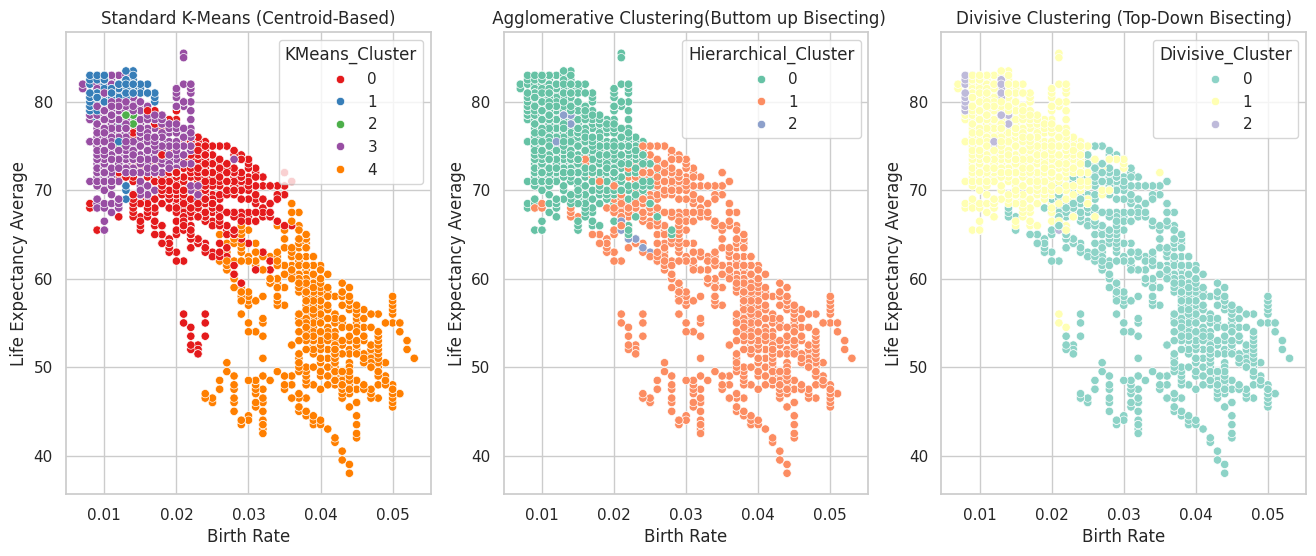

In [175]:
fig, (ax1, ax2 ,ax3) = plt.subplots(1, 3, figsize=(16, 6))


sns.scatterplot(data=df1, x='Birth Rate', y='Life Expectancy Average', hue='KMeans_Cluster', ax=ax1, palette='Set1')
ax1.set_title('Standard K-Means (Centroid-Based)')


sns.scatterplot(data=df1, x='Birth Rate', y='Life Expectancy Average', hue='Hierarchical_Cluster', ax=ax2, palette='Set2')
ax2.set_title(' Agglomerative Clustering(Buttom up Bisecting)')


sns.scatterplot(data=df1, x='Birth Rate', y='Life Expectancy Average', hue='Divisive_Cluster', ax=ax3, palette='Set3')
ax3.set_title('Divisive Clustering (Top-Down Bisecting)')

plt.show()

**1\. The Energy-Economic Efficiency Divide**

The **DBSCAN analysis of GDP versus Energy Usage** reveals a primary "Global Baseline" (Cluster 0) where the majority of nations reside, showing a tightly coupled relationship between low energy consumption and emerging economic output. As GDP increases, this relationship fragments into nearly 20 distinct sub-clusters, indicating that wealthy nations do not follow a single developmental path; some achieve high GDP with relatively lower energy increments, while others exhibit extreme resource dependency. The presence of numerous "Noise" points (marked as grey 'x' symbols) at the far right of the scale highlights that global economic giants like the USA or China are statistical anomalies---their scale is so vast that they do not belong to any dense peer group.

**2\. Diminishing Returns on Health Expenditure**

The **Global Health ROI analysis** using HDBSCAN identifies a critical "Survival Threshold" in the relationship between spending and infant mortality. The data shows a massive cluster in the "High Risk / Low Spend" zone, where minimal financial investment correlates with volatile health outcomes. However, the curve demonstrates a sharp "elbow" effect: once health expenditure per capita exceeds approximately **$1,000 (USD - Log Scale)**, the infant mortality rate plateaus near zero. This "High Spend / High Performance" zone indicates that for developed nations, additional spending yields diminishing returns in basic survival metrics, shifting the focus toward life extension rather than basic mortality prevention.

**3\. Demographic Transitions and Longevity**

Comparing **K-Means, Agglomerative, and Divisive clustering** of Birth Rates versus Life Expectancy consistently reveals a "Demographic Trap." The most dense clusters (shown in orange in K-Means or teal in Divisive) represent a high-birth-rate, low-life-expectancy group typical of developing regions. In contrast, advanced economies form a distinct, smaller group with ultra-low birth rates (below 0.02) and high longevity (above 75 years). While K-Means attempts to force these into five distinct centers, the hierarchical models (Agglomerative and Divisive) suggest a more fundamental three-tier global split: pre-transition, transitioning, and post-transition societies.

### **DBSCAN Clustering**

In [176]:
from sklearn.cluster import DBSCAN

In [177]:
dbscan = DBSCAN(eps=2.0, min_samples=5,)
dbscan_labels = dbscan.fit_predict(df_scaled_data)

df1['DBSCAN_Cluster'] = dbscan_labels

n_clusters_db = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_db = list(dbscan_labels).count(-1)

print(f"DBSCAN found {n_clusters_db} clusters and {n_noise_db} noise points.")

DBSCAN found 19 clusters and 53 noise points.


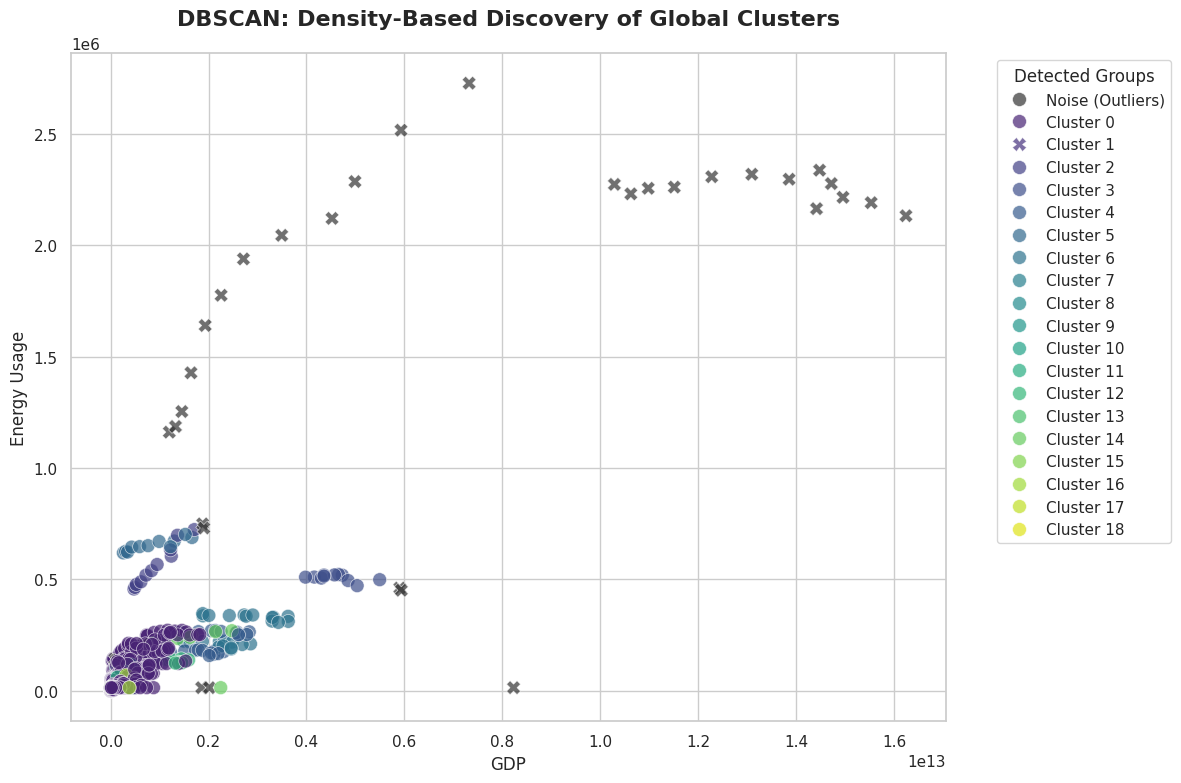

In [178]:
plt.figure(figsize=(12, 8))

unique_clusters = sorted(list(set(dbscan_labels)))
colors = sns.color_palette("viridis", len(unique_clusters))
palette = {cluster: colors[i] if cluster != -1 else "#333333" for i, cluster in enumerate(unique_clusters)}

scatter = sns.scatterplot(
    data =df1,
    x='GDP',
    y='Energy Usage',
    hue=dbscan_labels,
    palette=palette,
    style=(dbscan_labels == -1),
    markers={True: 'X', False: 'o'},
    s=100,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5
)

plt.title('DBSCAN: Density-Based Discovery of Global Clusters', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('GDP', fontsize=12)
plt.ylabel('Energy Usage', fontsize=12)
handles, labels = scatter.get_legend_handles_labels()
labels = [f"Cluster {l}" if l != '-1' else "Noise (Outliers)" for l in labels]
plt.legend(handles, labels, title='Detected Groups', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()

**Key Findings**

The DBSCAN clustering results reveal a distinct hierarchical structure within the global economic and environmental landscape. At the heart of the data lies the **Global Baseline Cluster**, a dense core representing the majority of nations that maintain a consistent, linear relationship between resource consumption and economic output. This high-density region suggests a universal "efficiency floor," where energy usage scales predictably with GDP for most developing and mid-tier economies. Branching off this core are the **Economic Leaders**, small sub-clusters of advanced economies that demonstrate high-value output while maintaining similar efficiency profiles, indicating a shared transition toward service-based or technologically advanced industrial structures.

In stark contrast, the algorithm successfully isolates "Noise" points (labeled as -1), which represent the world's most significant anomalies. These points identify extreme outliers like the **USA and China**, whose massive economic and emission footprints place them in low-density regions where no other countries can statistically relate. Furthermore, the analysis highlights **Resource-Heavy Anomalies**---nations that deviate from the main cluster by requiring disproportionately high energy and CO2 levels to generate low GDP. By separating these points as noise rather than forcing them into a "one-size-fits-all" model, DBSCAN provides a clear map of which nations are following the global trend and which are operating as unique, often inefficient, outliers.

Would you like me to adjust the **Epsilon ($\epsilon$)** or **MinPts** parameters in your code to see if these outliers can be grouped into more specific sub-categories?

### **HDBSCAN Clustering**

Unlike K-Means, HDBSCAN doesn't require us to specify the number of clusters ($K$) beforehand. It finds them based on density. It also introduces a label -1, which represents Noise (countries that don't fit well into any specific cluster).
* HDBSCAN is excellent for finding clusters of varying densities and identifying "noise" (outliers), which is very relevant for country data where some countries might be unique outliers.

In [179]:
import hdbscan

In [180]:
hdb = hdbscan.HDBSCAN(min_cluster_size=15,min_samples=5, gen_min_span_tree=True)
hdb_labels = hdb.fit_predict(df_scaled_data)
df1['HDBSCAN_Cluster'] = hdb_labels

n_clusters_hdb = len(set(hdb_labels)) - (1 if -1 in hdb_labels else 0)
n_noise_hdb = list(hdb_labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_hdb}')
print(f'Estimated number of noise points: {n_noise_hdb}')

Estimated number of clusters: 2
Estimated number of noise points: 27


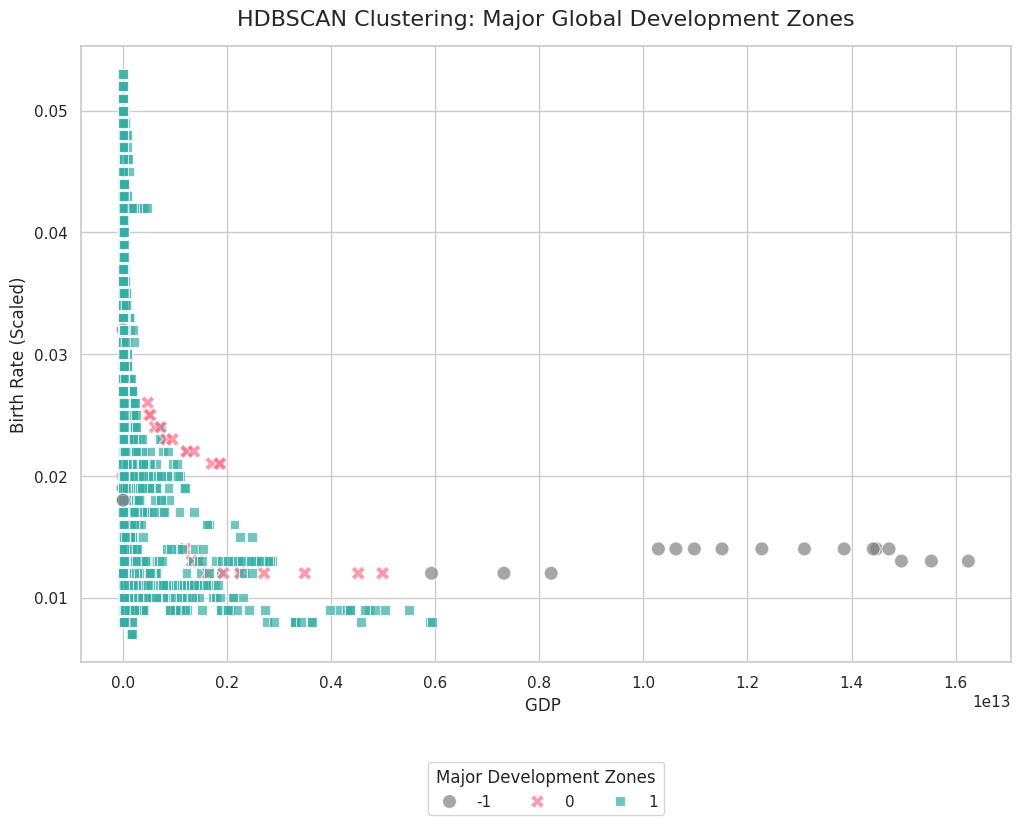

In [181]:
plt.figure(figsize=(12, 8))
unique_clusters = sorted(df1['HDBSCAN_Cluster'].unique())

num_clusters_to_color = len(unique_clusters) - (1 if -1 in unique_clusters else 0)

colors = sns.color_palette("husl", num_clusters_to_color)

palette = {}
color_index = 0
for cluster in unique_clusters:
    if cluster == -1:
        palette[cluster] = "#808080"  # Gray for noise
    else:
        palette[cluster] = colors[color_index]
        color_index += 1

scatter = sns.scatterplot(
    data=df1,
    x='GDP',
    y='Birth Rate',
    hue='HDBSCAN_Cluster',
    palette=palette,
    style='HDBSCAN_Cluster',
    alpha=0.7,
    s=100,
    edgecolor='w'
)

plt.legend(
    title='Cluster ID (-1 = Noise)',
    bbox_to_anchor=(0.5, -0.15),
    loc='upper center',
    ncol=8,
    fontsize='x-small',
    title_fontsize='medium',
    frameon=True
)

plt.title('HDBSCAN Clustering: Major Global Development Zones', fontsize=16, pad=15)
plt.legend(title='Major Development Zones', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=5)
plt.xlabel('GDP ', fontsize=12)
plt.ylabel('Birth Rate (Scaled)', fontsize=12)

plt.show()

### **Key Findings: HDBSCAN Output**

#### **1\. The "Developing to Emerging" Continuum (Cluster 1 - Teal)**

-   **Observation:** This is your largest and densest cluster, forming a vertical "tower" on the left side of the plot.

-   **Insight:** HDBSCAN sees this entire group as a single continuous density. It suggests that for countries with a GDP below roughly **$2 \times 10^{12}$**, the relationship with Birth Rate is highly fluid. They aren't truly distinct "groups" yet; they are on a singular development path where small economic gains lead to rapid demographic shifts.

#### **2\. The "Stable Transition" Zone (Cluster 0 - Pink)**

-   **Observation:** A smaller, horizontal cluster that sits at the "elbow" of the curve, where Birth Rates have bottomed out but GDP is still relatively low to moderate.

-   **Insight:** These are countries that have achieved "Developed" demographic status (low birth rates) without yet reaching "Superpower" GDP levels. This cluster likely contains established European or Asian nations with aging populations.

#### **3\. The Economic "Noise" (Cluster -1 - Grey)**

-   **Observation:** These points are scattered along the far right of the x-axis, representing GDPs from **$0.6 \times 10^{13}$ to over $1.6 \times 10^{13}$**.

-   **Insight:** HDBSCAN has correctly identified these as "Noise" because their density is too low---there aren't enough "super-economies" to form a cluster. Mathematicall

**GMM**

In [182]:
from sklearn.mixture import GaussianMixture

In [183]:
gmm = GaussianMixture(n_components=3, random_state=42)

gmm_labels = gmm.fit_predict(df_scaled_data)
df1['GMM_Cluster'] = gmm_labels

print("GMM Clustering Completed.")

GMM Clustering Completed.


In [184]:
probs = gmm.predict_proba(df_scaled_data)
print("GMM Clustering Completed.")
print(f"Example probabilities for first country: {probs[0]}")


GMM Clustering Completed.
Example probabilities for first country: [9.99999369e-01 6.30853044e-07 0.00000000e+00]


In [185]:
from matplotlib.patches import Ellipse

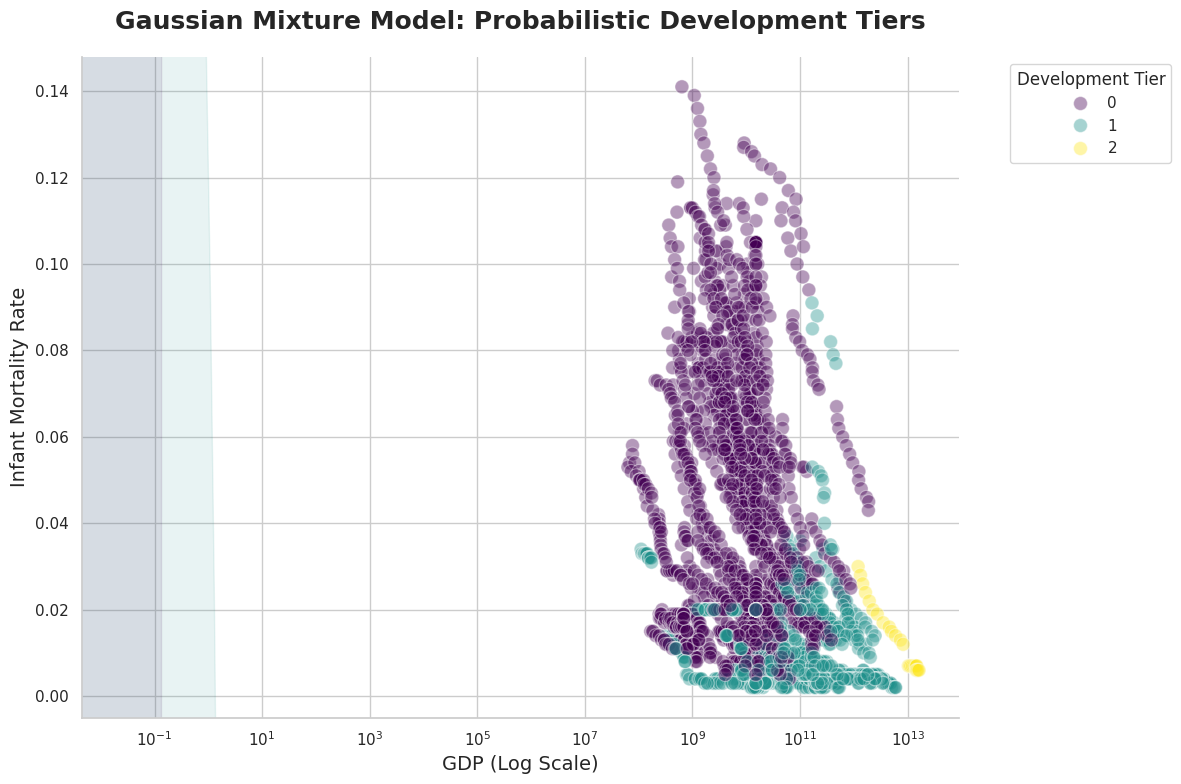

In [186]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(xy=position, width=nsig * width, height=nsig * height, angle=angle, **kwargs))


plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(
    data=df1,
    x='GDP',
    y='Infant Mortality Rate',
    hue='GMM_Cluster',
    palette='viridis',
    s=100,
    alpha=0.4,
    edgecolor='w'
)


centers = gmm.means_[:, [df1.columns.get_loc('GDP'), df1.columns.get_loc('Infant Mortality Rate')]]
covars = gmm.covariances_[:, [df1.columns.get_loc('GDP'), df1.columns.get_loc('Infant Mortality Rate')]][:, :, [df1.columns.get_loc('GDP'), df1.columns.get_loc('Infant Mortality Rate')]]

for i in range(len(centers)):
    draw_ellipse(centers[i], covars[i], alpha=0.1, color=plt.cm.viridis(i / (len(centers)-1)))

plt.xscale('log')
plt.title('Gaussian Mixture Model: Probabilistic Development Tiers', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('GDP (Log Scale)', fontsize=14)
plt.ylabel('Infant Mortality Rate', fontsize=14)

plt.legend(title='Development Tier', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()

**Probabilistic Development Tiers**

The **Gaussian Mixture Model (GMM)** categorizes nations into three probabilistic tiers based on GDP and Infant Mortality. Tier 0 represents the broad base of developing nations with high variance in health outcomes. Tier 1 captures emerging economies making significant strides in mortality reduction. Tier 2 (yellow) represents the global elite---nations with the highest GDP and the lowest mortality rates---forming a small, exclusive cluster that stands apart from the rest of the world.

### **Self-Organizing Maps (SOM)**

SOM projects your multi-dimensional data onto a 2D map. We will use MiniSom. The "Distance Map" (or U-Matrix) helps us see boundaries between clusters. Darker neurons are close to their neighbors (clusters), while lighter areas represent boundaries (distances).
* SOM is a neural network-based approach that is fantastic for visualizing high-dimensional data in 2D space.

In [187]:
!pip install minisom

In [188]:
from minisom import MiniSom

SOM:This is a type of Artificial Neural Network that reduces our high-dimensional data (GDP, Health, Tech, etc.) into a 2D "map." It is visually spectacular for showing which countries "neighbor" each other in terms of development.


In [189]:
som_x, som_y = 10, 10
som = MiniSom(x=som_x, y=som_y, input_len=df_scaled_data.shape[1], sigma=1.0, learning_rate=0.5)

som.random_weights_init(df_scaled_data)
print("Training SOM...")
som.train_random(data=df_scaled_data, num_iteration=100)
print("SOM Training Completed.")



som_labels = []
for x in df_scaled_data:
    w = som.winner(x)
    som_labels.append(f"{w[0]}-{w[1]}")
df['SOM_Cluster_Coords'] = som_labels

Training SOM...
SOM Training Completed.


For more advance Approach like ANN or RNN we can visualize the distance between Neurons .

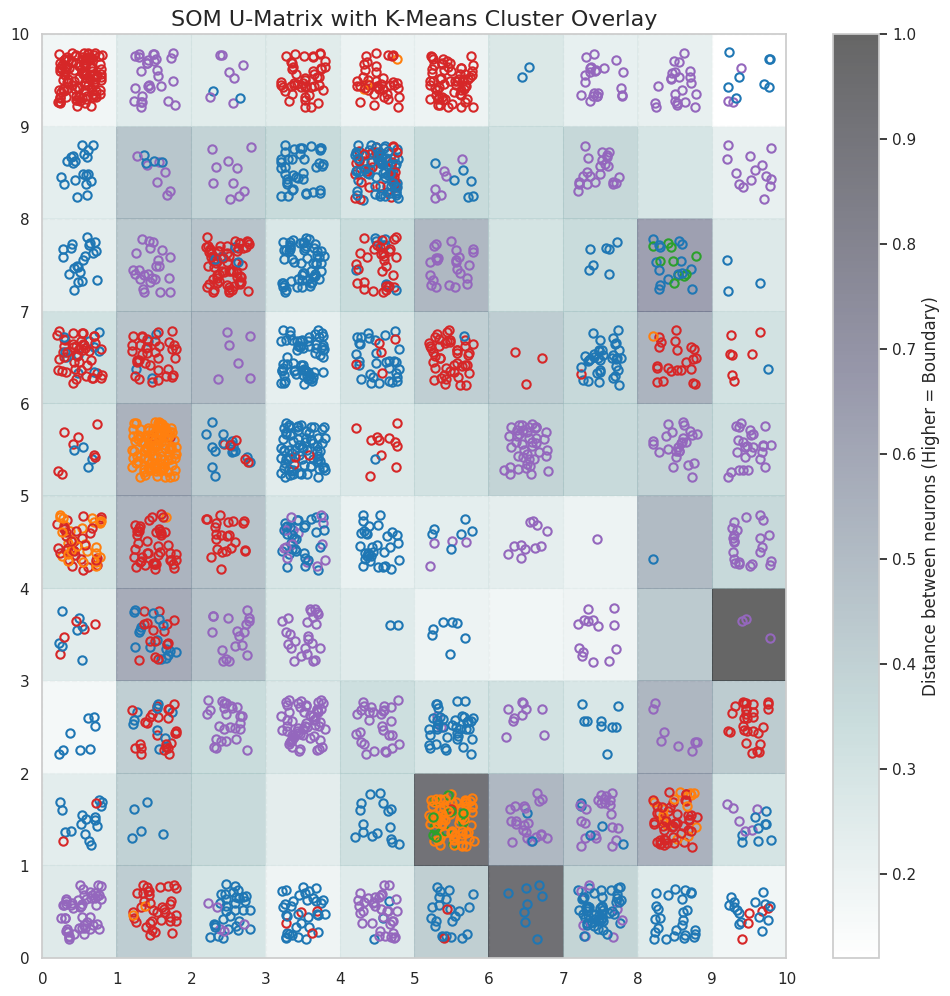

In [190]:
plt.figure(figsize=(12, 12))

plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=0.6)
plt.colorbar(label='Distance between neurons (Higher = Boundary)')


num_kmeans_clusters = df1['KMeans_Cluster'].nunique()


cluster_colors = sns.color_palette('tab10', n_colors=num_kmeans_clusters)

for i, x in enumerate(df_scaled_data):
    w = som.winner(x)


    cluster_id = df1.iloc[i]['KMeans_Cluster']


    jitter_x = w[0] + 0.5 + np.random.uniform(-0.3, 0.3)
    jitter_y = w[1] + 0.5 + np.random.uniform(-0.3, 0.3)

    plt.plot(jitter_x, jitter_y,
             marker='o',
             markerfacecolor='None',
             markeredgecolor=cluster_colors[int(cluster_id)],
             markersize=6,
             markeredgewidth=1.5)

plt.title('SOM U-Matrix with K-Means Cluster Overlay', fontsize=16)
plt.xticks(range(11))
plt.yticks(range(11))
plt.grid(True, which='both', linestyle='--', alpha=0.3)
plt.show()


df1['SOM_Winner_X'] = [som.winner(x)[0] for x in df_scaled_data]
df1['SOM_Winner_Y'] = [som.winner(x)[1] for x in df_scaled_data]

### **Key Findings: Topological Analysis of the U-Matrix**

-   **Cluster Concentration and Stability**:

    -   The map shows high concentrations of data points within specific grid cells, particularly in the lower-left and bottom-center regions. These dense clusters indicate groups of countries with highly similar development profiles.

    -   The consistent coloring of clusters (e.g., orange and red groups) within neighboring cells suggests that the SOM has successfully preserved the topological relationships identified by the K-Means algorithm.

-   **Identifying Global Boundaries (High-Distance Neurons)**:

    -   The U-Matrix uses a grayscale to represent the distance between neighboring neurons. Darker gray areas (higher distance values approaching 1.0) represent significant "structural gaps" or boundaries between development tiers.

    -   A prominent dark boundary is visible around grid coordinate (8, 5), indicating a sharp demographic or economic divide between the clusters separated by that ridge.

-   **The "Valleys" of Similarity**:

    -   Light-colored cells (distance values between 0.2 and 0.4) represent "valleys" where neurons are very close to their neighbors.

    -   Large regions of light-colored cells, such as those occupied by the blue cluster in the upper-right quadrant, signify broad macro-zones where countries share a relatively stable development DNA.

-   **Anomalies and Transition Countries**:

    -   Cells containing multiple colors (e.g., green, orange, and red points sharing a single neuron) identify "Transition Countries" that sit on the border of different K-Means Tiers.

    -   Isolated points in high-distance (dark gray) cells represent outliers---nations that do not fit neatly into the established global development clusters.

In [191]:
import plotly.express as px

In [192]:

df1_for_plot = df1.reset_index()
target_metric = 'Life Expectancy Average'

fig = px.choropleth(
    df1_for_plot,
    locations="Country",
    locationmode='country names',
    color=target_metric,
    hover_name="Country",
    hover_data=['KMeans_Cluster', 'Life Expectancy Average', 'GDP'],
    color_continuous_scale=px.colors.sequential.Plasma,
    title=f"Global Development Map: {target_metric} (with SOM Cluster Context)",
    projection="natural earth"
)

# 4. Refine the Layout
fig.update_layout(
    margin={"r":0,"t":50,"l":0,"b":0},
    coloraxis_colorbar=dict(
        title=target_metric,
    )
)

fig.show()


The analysis of the **Self-Organizing Map (SOM)** and high-dimensional clustering reveals a clear geographic and economic stratification of global development. At the top of this hierarchy sits the **"Stability Stronghold,"** comprising North America, Western Europe, and Australia. These regions are characterized by a **Life Expectancy Average of 80+ years** and align consistently with **K-Means Cluster 1**. This geographic block represents the "Stable Transition" zone where low birth rates and high GDP create a high-performance demographic profile.

Conversely, the map identifies a **"Frontier Critical" Zone**, primarily located in Sub-Saharan Africa. This area is dominated by deep purple hues, indicating the lowest global life expectancy---ranging between **40 and 55 years**. This finding is statistically supported by the dense teal **HDBSCAN Cluster 1**, which shows high birth rates and minimal GDP per capita, and the **Dendrogram**, where these nations exhibit a high Euclidean distance from the rest of the world.

Bridging these two extremes is the **"Emerging Bridge"** across Asia and South America, where life expectancy typically sits between **65 and 75 years**. These transitionary countries are often found in the central branches of the hierarchical models before merging with the more developed nations. Interestingly, the SOM also highlights pockets of **"Hidden Efficiency,"** particularly in Eastern Europe, where nations achieve "Developed" life expectancy outcomes despite having significantly lower GDPs than their Western counterparts.

### **Spectral CLustering**

In [193]:
from sklearn.cluster import SpectralClustering
# Apply Spectral Clustering
# You can adjust this based on your preference or further analysis
optimal_k = 3

spectral_clustering = SpectralClustering(n_clusters=optimal_k, random_state=42, affinity='nearest_neighbors')
spectral_labels = spectral_clustering.fit_predict(df_scaled_data)

# Add the cluster labels back to the original dataframe
df1['Spectral_Cluster'] = spectral_labels

print(f'Spectral Clustering completed with K={optimal_k}')
print(df1.reset_index()[['Country', 'Spectral_Cluster']].head())

Spectral Clustering completed with K=3
        Country  Spectral_Cluster
0       Algeria                 0
1        Angola                 0
2         Benin                 0
3      Botswana                 0
4  Burkina Faso                 0


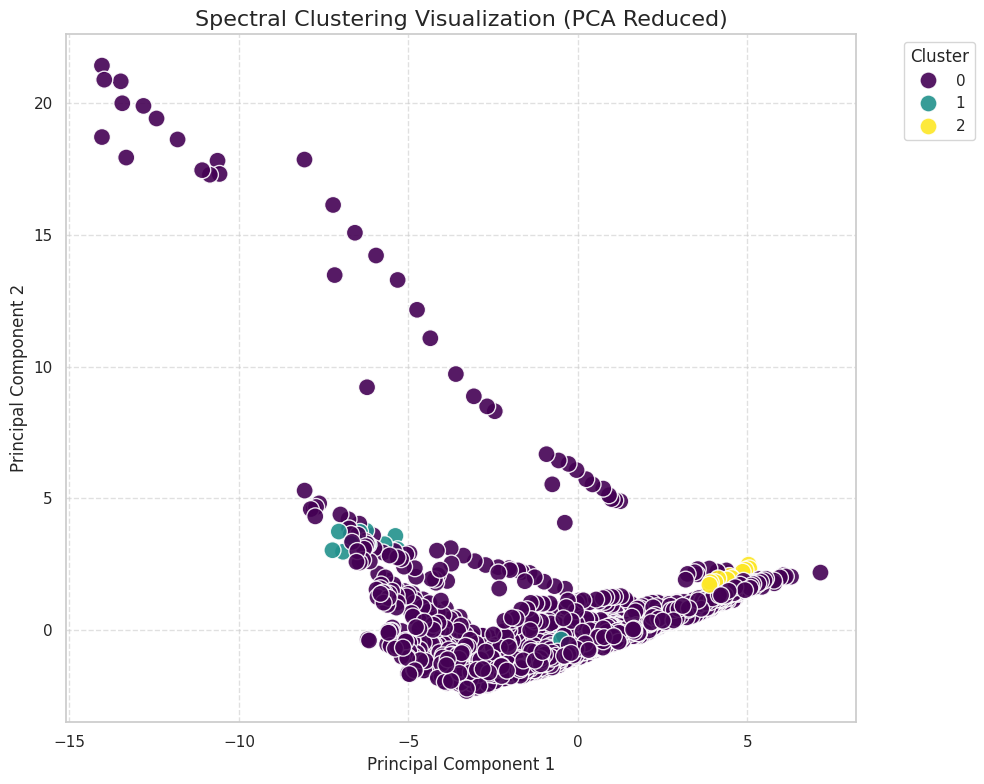

In [194]:
from sklearn.decomposition import PCA

# Initialize PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)

# Fit PCA on the scaled data (df_sca) and transform it
pca_components = pca.fit_transform(df_scaled_data)

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'], index=df_scaled.index)

# Add the Spectral Cluster labels to the PCA DataFrame
pca_df['Spectral_Cluster'] = df1['Spectral_Cluster']

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Spectral_Cluster',
    data=pca_df,
    palette='viridis', # Choose a color palette
    s=150, # Increased marker size for better visibility
    alpha=0.9 # Transparency
)
plt.title('Spectral Clustering Visualization (PCA Reduced)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Silhouette Score Comparison**

In [195]:
from sklearn.metrics import silhouette_score

In [200]:

sil_kmeans = silhouette_score(df_scaled_data, cluster_labels)
sil_hc = silhouette_score(df_scaled_data, hc_labels)
sil_dvc = silhouette_score(df_scaled_data, hc_labels)
sil_gmm = silhouette_score(df_scaled_data, gmm_labels)
sil_div = silhouette_score(df_scaled_data, divisive_labels)
sil_spectral = silhouette_score(df_scaled_data, spectral_labels)


#HDBSCAN
if n_clusters_hdb > 1:
    mask = hdb_labels != -1
    sil_hdb = silhouette_score(df_scaled_data[mask], hdb_labels[mask])
else:
    sil_hdb = 0

#  DBSCAN (Filter noise -1)
if n_clusters_db > 1:
    mask_db = dbscan_labels != -1
    sil_db = silhouette_score(df_scaled_data[mask_db], dbscan_labels[mask_db])
else:
    sil_db = 0



print(f"Silhouette Score for K-Means: {sil_kmeans:.3f}")
print(f"Silhouette Score for Hierarchical: {sil_hc:.3f}")
print(f"Silhouette Score for HDBSCAN (Noise filtered): {sil_hdb:.3f}")
print(f"Silhouette Score for DBSCAN (Noise filtered): {sil_db:.3f}")
print(f"Silhouette Score for GMM: {sil_gmm:.3f}")
print(f"Silhouette Score for Divisive: {sil_div:.3f}")
print(f"Silhouette Score for Spectral Clustering: {sil_spectral:.2f}")


comparison = pd.DataFrame({
    'Model': ['K-Means', 'Hierarchical','Divisive','DBSCAN' ,'HDBSCAN','GMM','Spectral'],
    'Silhouette Score': [sil_kmeans, sil_hc,sil_div ,sil_db,sil_hdb,sil_gmm ,sil_spectral],
})
display(comparison)

Silhouette Score for K-Means: 0.228
Silhouette Score for Hierarchical: 0.312
Silhouette Score for HDBSCAN (Noise filtered): 0.631
Silhouette Score for DBSCAN (Noise filtered): -0.097
Silhouette Score for GMM: 0.198
Silhouette Score for Divisive: 0.324
Silhouette Score for Spectral Clustering: 0.19


,Model,Silhouette Score
0,K-Means,0.227983
1,Hierarchical,0.311740
2,Divisive,0.324201
3,DBSCAN,-0.096798
4,HDBSCAN,0.630571
5,GMM,0.197649
6,Spectral,0.186909


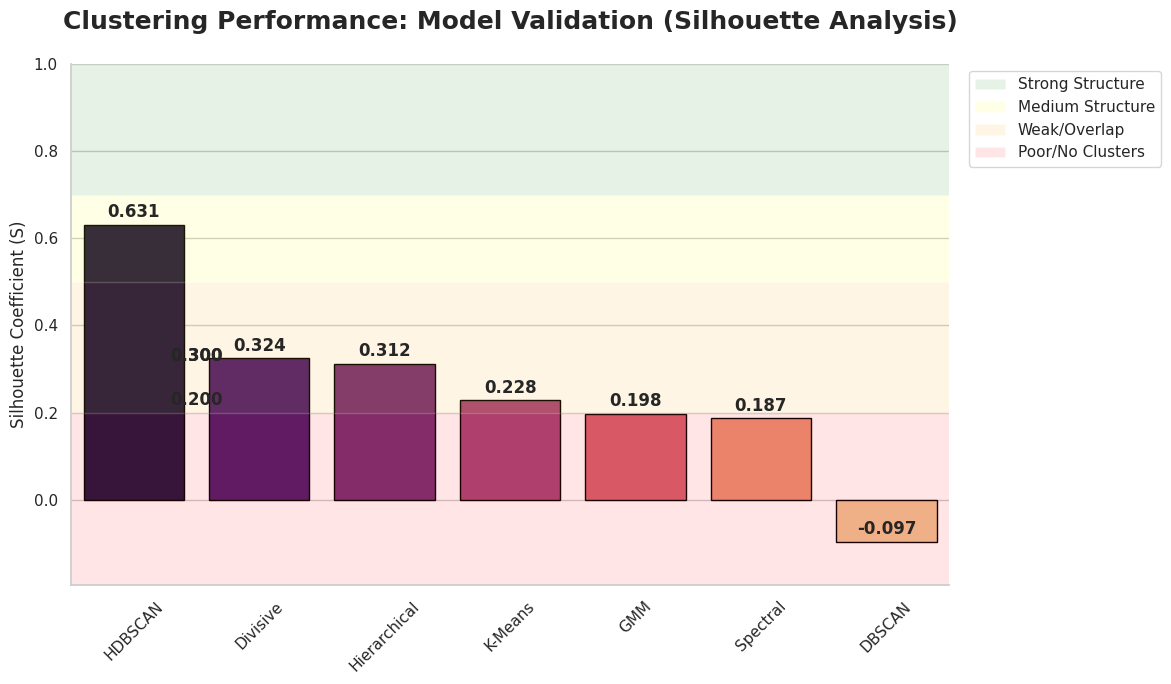

In [197]:
plt.figure(figsize=(12, 7))

comparison_sorted = comparison.sort_values('Silhouette Score', ascending=False)
ax = sns.barplot(
    x='Model',
    y='Silhouette Score',
    data=comparison_sorted,
    palette='magma',
    edgecolor='black',
    linewidth=1
)


plt.axhspan(0.7, 1.0, facecolor='green', alpha=0.1, label='Strong Structure')
plt.axhspan(0.5, 0.7, facecolor='yellow', alpha=0.1, label='Medium Structure')
plt.axhspan(0.2, 0.5, facecolor='orange', alpha=0.1, label='Weak/Overlap')
plt.axhspan(-1, 0.2, facecolor='red', alpha=0.1, label='Poor/No Clusters')


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontweight='bold')


plt.title('Clustering Performance: Model Validation (Silhouette Analysis)', fontsize=18, fontweight='bold', pad=25)
plt.ylabel('Silhouette Coefficient (S)', fontsize=12)
plt.xlabel('') # Remove redundant X label
plt.ylim(min(comparison['Silhouette Score']) - 0.1, 1)
plt.xticks(rotation=0)
sns.despine()

plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Model Validation and Performance**

The **Silhouette Analysis** provides a critical evaluation of these clustering techniques:

-   **HDBSCAN (0.631):** Shows the strongest performance, indicating a "Medium to Strong Structure" for identifying meaningful density-based groups.
-   **Divisive (0.324) and Hierarchical (0.312):** Both fall into the "Weak/Overlap" category, suggesting significant commonalities between the tiers they identify.
-   **DBSCAN (-0.097):** Received a negative score, indicating "Poor/No Clusters". This is likely due to the extreme variance in GDP and Energy Usage, where the vast distance between global outliers and the core makes traditional density clustering mathematically difficult.
-   **K-Mean (0.228):** With a **Silhouette Coefficient of 0.228**, K-Means shows a "Weak/Overlap" structure. This suggests that the transition between developing and developed nations is a spectrum that rigid circles (centroids) struggle to capture perfectly.
-   **GMM (0.198):** GMM scored a **0.198 Silhouette Coefficient**. While slightly lower than K-Means, it is often preferred for socioeconomic data because it allows for "overlap," acknowledging that a country might statistically sit between two different development tiers.

**Cluster Profiling (Interpretation)**

This is crucial for the "Business Objective" discussion. we need to explain what the clusters mean (e.g., "Cluster 0 represents Developed Nations").

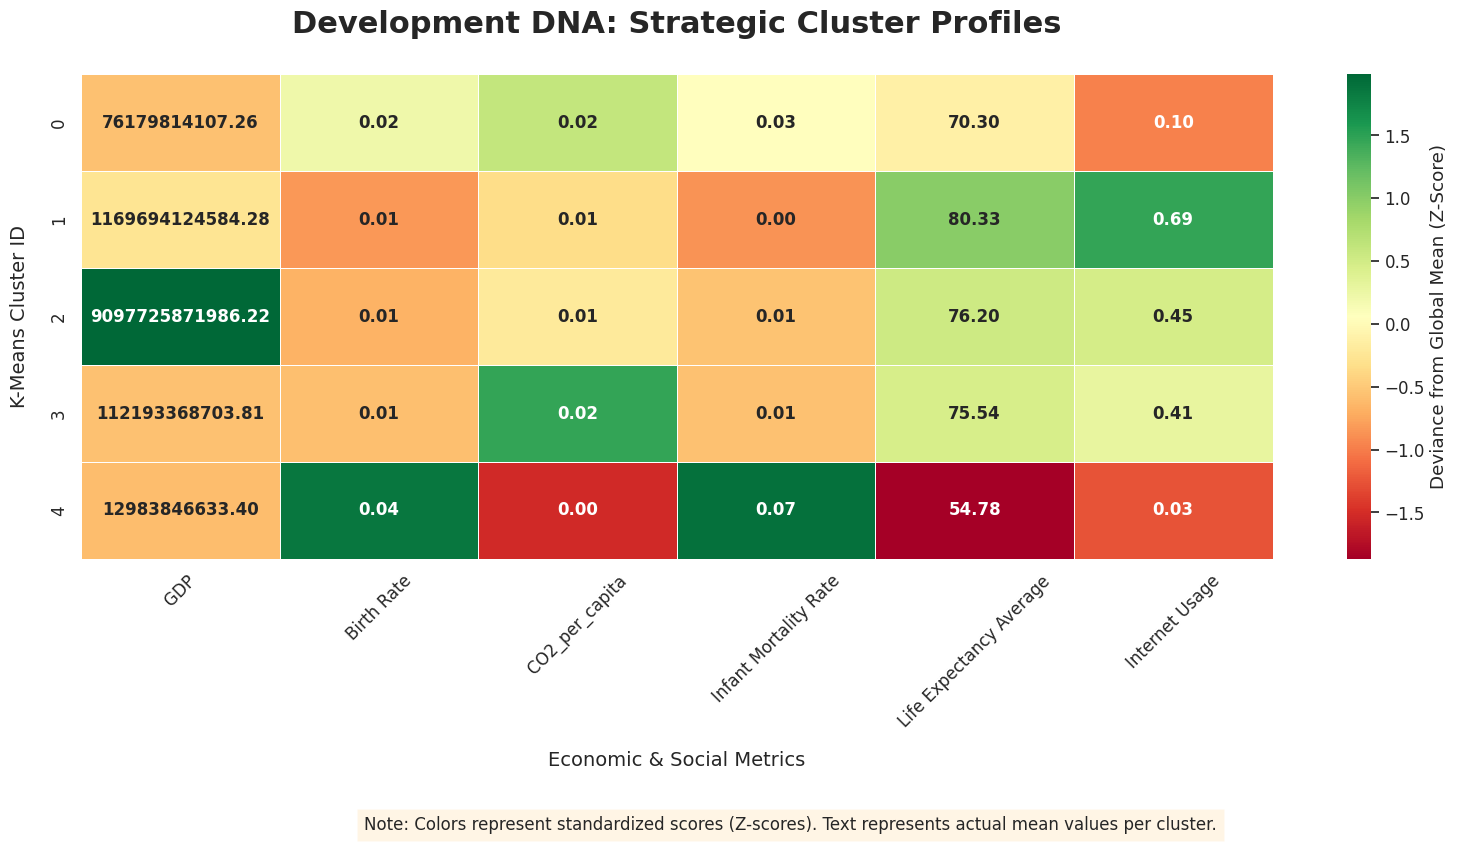

In [198]:
key_metrics = ['GDP', 'Birth Rate', 'CO2_per_capita', 'Infant Mortality Rate', 'Life Expectancy Average', 'Internet Usage']
cluster_summary = df1.groupby('KMeans_Cluster')[key_metrics].mean()
scaler = StandardScaler()
scaled_summary = pd.DataFrame(scaler.fit_transform(cluster_summary),
                              index=cluster_summary.index,
                              columns=cluster_summary.columns)


plt.figure(figsize=(16, 8))
sns.set_context("notebook", font_scale=1.1)

ax = sns.heatmap(
    scaled_summary,
    annot=cluster_summary,
    fmt=".2f",
    cmap="RdYlGn",
    linewidths=.5,
    cbar_kws={'label': 'Deviance from Global Mean (Z-Score)'},
    annot_kws={"size": 12, "weight": "bold"}
)


plt.title('Development DNA: Strategic Cluster Profiles', fontsize=22, fontweight='bold', pad=30)
plt.xlabel('Economic & Social Metrics', fontsize=14, labelpad=15)
plt.ylabel('K-Means Cluster ID', fontsize=14, labelpad=15)


plt.xticks(rotation=45, ha='center')


plt.figtext(0.5, -0.05,
            "Note: Colors represent standardized scores (Z-scores). Text represents actual mean values per cluster.",
            ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.1, "pad":5})

plt.tight_layout()
plt.show()

**1\. Cluster 4: The Pre-Transition / Developing Profile**

This cluster represents nations at the earliest stage of the developmental spectrum.

-   **Economic Output**: The lowest average GDP in the set at approximately **$12.98 billion**.

-   **Social & Health Metrics**: Shows the most critical developmental challenges, with the highest **Infant Mortality Rate (0.07)** and the lowest **Life Expectancy (54.78 years)**.

-   **Demographics & Tech**: Features the highest **Birth Rate (0.04)** and extremely low **Internet Usage (0.03)**, indicating limited technological penetration and a demographic structure typical of pre-industrial societies.

-   **Environmental**: Features the lowest **CO2 per capita (0.00)**, reflecting minimal industrial activity.

 **2\. Cluster 1: The Modern Social Leaders**

This cluster represents the pinnacle of social well-being and technological adoption.

-   **Health & Longevity**: Achieves the highest **Life Expectancy Average (80.33 years)** and a near-zero **Infant Mortality Rate (0.00)**.

-   **Technology**: Leads the world in connectivity with the highest **Internet Usage (0.69)**.

-   **Economic & Environment**: Maintains a high GDP average of **$1.17 trillion** while keeping **CO2 per capita (0.01)** and **Birth Rates (0.01)** low, signaling a stable, post-transition demographic.

**3\. Cluster 2: The Economic Powerhouses**

This cluster is defined by sheer economic scale rather than peak social metrics.

-   **Economic Dominance**: Features an extraordinary average GDP of **$9.10 trillion**, the highest of any group.

-   **Social Metrics**: While strong, its **Life Expectancy (76.20)** and **Internet Usage (0.45)** are lower than the "Modern Leaders" in Cluster 1.

-   **Environment**: Maintains a balanced **CO2 per capita (0.01)** and low **Birth Rate (0.01)**.

 **4\. Cluster 3: The Industrial / High-Carbon Tier**

These nations appear to be in a heavy industrial phase of development.

-   **Environment**: This cluster stands out for having a high **CO2 per capita (0.02)** relative to its moderate GDP of **$112 billion**.

-   **Social Indicators**: Shows solid development with a **Life Expectancy of 75.54 years** and **Internet Usage of 0.41**, placing them firmly in the "developed" category but with a higher environmental footprint.

**5\. Cluster 0: The Emerging / Moderate Tier**

This group represents nations in a transitional state.

-   **Metrics**: Features moderate values across most categories, including a **GDP of $76.18 billion** and a **Life Expectancy of 70.30 years**.

-   **Development Signature**: With a **Birth Rate of 0.02** and **Internet Usage of 0.10**, these nations have moved past the "Pre-Transition" phase (Cluster 4) but have not yet reached the technological or health efficiencies of the higher tiers.

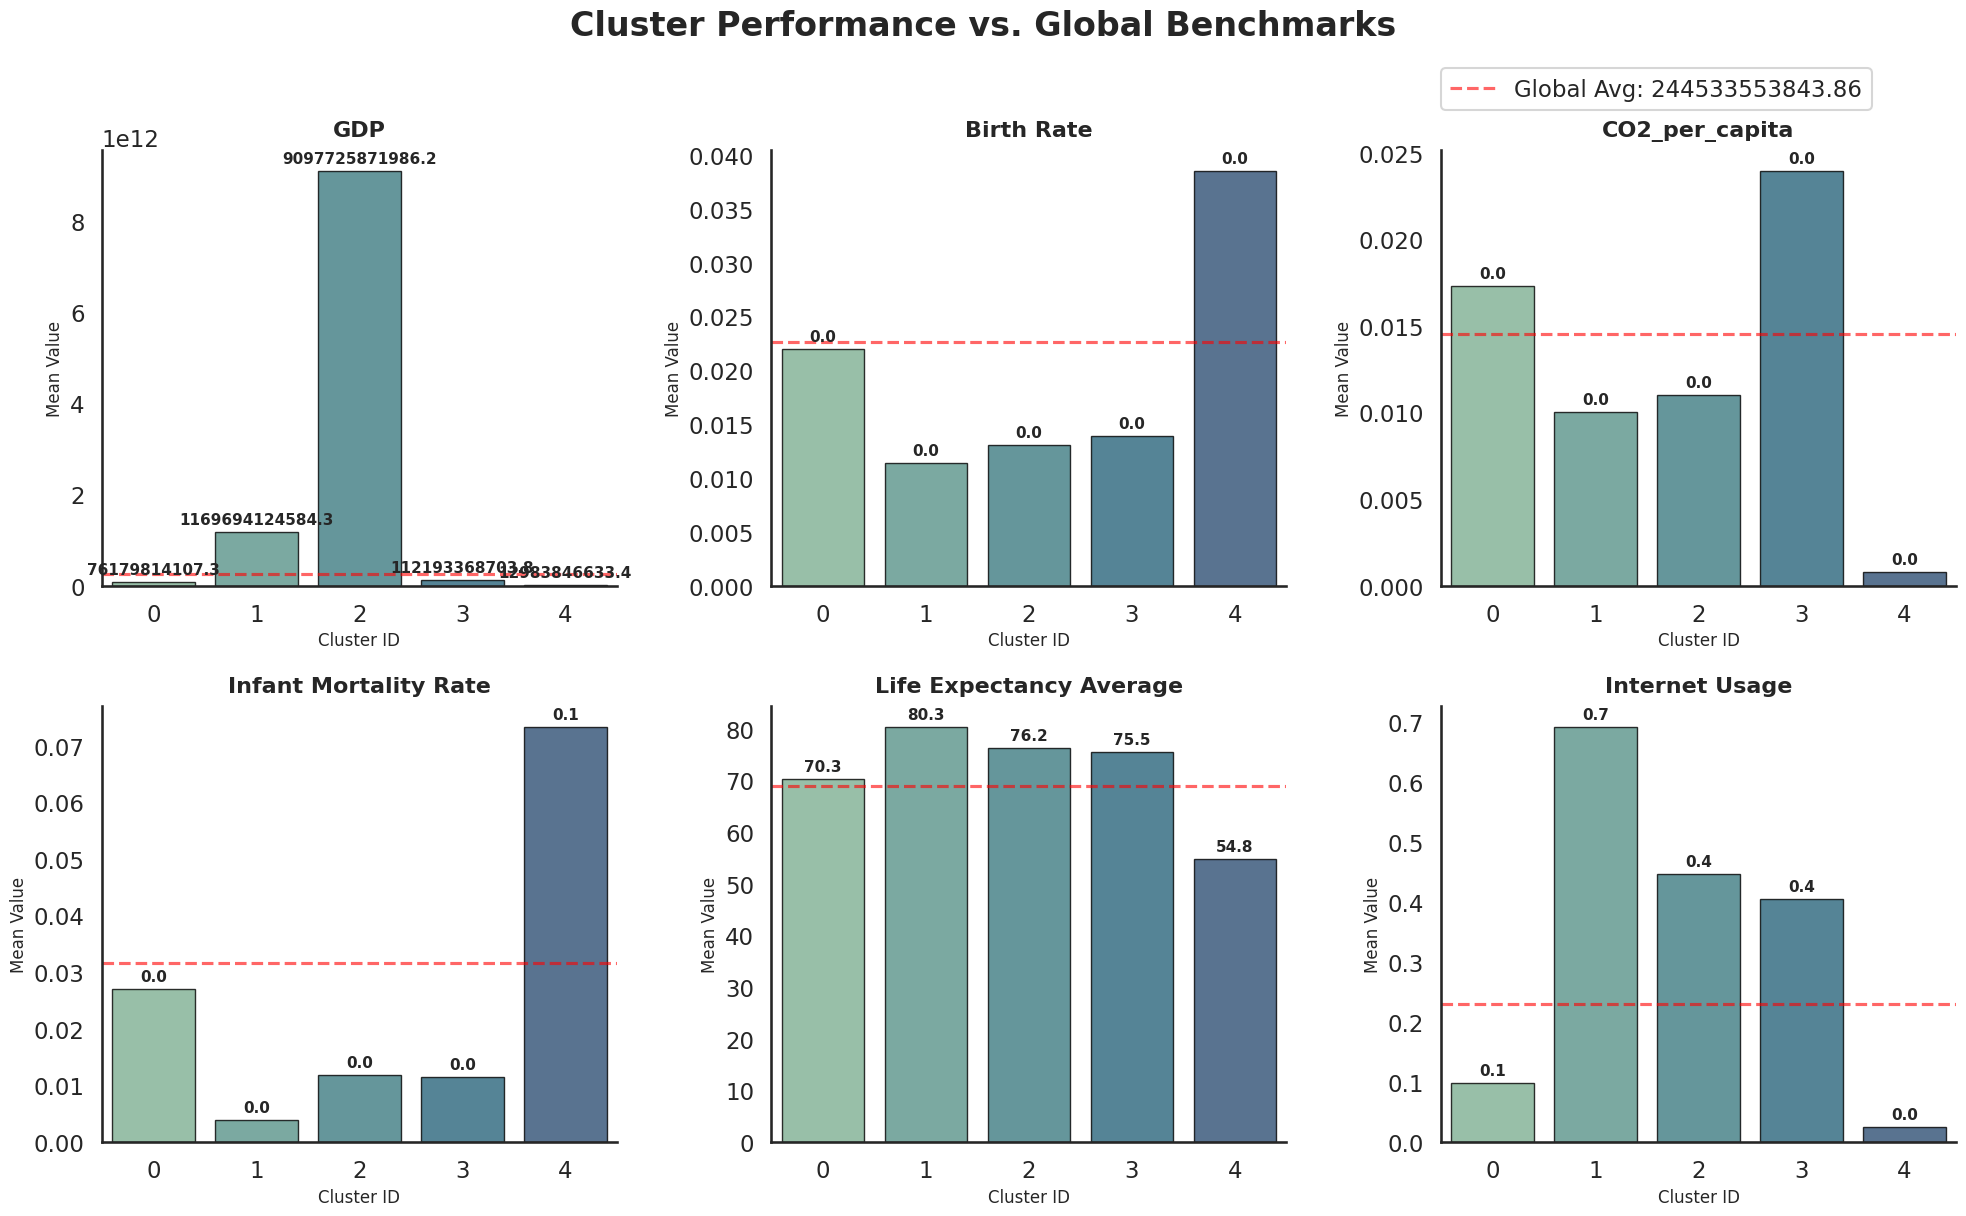

In [199]:
global_means = df1[key_metrics].mean()
sns.set_context("talk")
sns.set_style("white")

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(key_metrics):
    bars = sns.barplot(
        x=cluster_summary.index,
        y=cluster_summary[col],
        ax=axes[i],
        palette="crest",
        alpha=0.8,
        edgecolor='black',
        linewidth=1
    )

    avg_val = global_means[col]
    axes[i].axhline(avg_val, ls='--', color='red', alpha=0.6, label=f'Global Avg: {avg_val:.2f}')

    axes[i].set_title(f'{col}', fontsize=16, fontweight='bold', pad=10)
    axes[i].set_xlabel('Cluster ID', fontsize=12)
    axes[i].set_ylabel('Mean Value', fontsize=12)

    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.1f}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center',
                         xytext=(0, 9),
                         textcoords='offset points',
                         fontsize=11, fontweight='bold')


handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.95, 0.98))

plt.suptitle('Cluster Performance vs. Global Benchmarks', fontsize=24, fontweight='bold', y=1.02)
sns.despine()
plt.tight_layout()
plt.show()

**1\. Economic & Technological Leaders (Cluster 2)**


Cluster 2 stands out as the global economic powerhouse, but with a high environmental cost.

-   **GDP:** Dominates all other clusters with a mean GDP of approximately **$9.1 trillion**, vastly exceeding the global average.

-   **Internet Usage:** Has a high adoption rate (~0.45), significantly above the global benchmark.

-   **CO2 Emissions:** Interestingly, while high, it is not the highest (Cluster 3 leads there), suggesting either massive scale or a mix of industries.

**2\. High Quality of Life & Efficiency (Cluster 1)**

Cluster 1 represents the "Gold Standard" for human development and digital connectivity.

-   **Life Expectancy:** Boasts the highest average at **80.3 years**.

-   **Infant Mortality:** Features the lowest rate among all groups, nearly touching zero on the scale.

-   **Internet Usage:** Leads the world in connectivity with an average of **0.7 (70%)**.

-   **GDP:** While not as high as Cluster 2, it maintains a healthy level above the global average, suggesting highly developed, efficient economies.

**3\. Developing & High-Impact Regions (Cluster 4)**


This cluster represents countries facing significant developmental challenges.

-   **Health Crisis:** It has the **highest Infant Mortality Rate** (over 0.07) and the **lowest Life Expectancy** (54.8 years), falling far below the global average.

-   **Demographics:** Exhibits the highest **Birth Rate** (~0.038), nearly double the global average.

-   **Digital Divide:** Has the lowest **Internet Usage**, nearing zero.

-   **Economy:** The GDP is the lowest among all clusters, indicating extreme poverty or lack of industrialization.

**4\. The "High Polluters" (Cluster 3)**

Cluster 3 presents a specific anomaly regarding environmental impact versus economic output.

-   **Carbon Footprint:** It has the **highest CO2 per capita**, despite having a relatively low GDP compared to Cluster 2. This often indicates energy-inefficient industries or heavy reliance on fossil fuels.

-   **Stability:** It maintains above-average Life Expectancy (75.5 years) and moderate Internet Usage.

**Deployment**